## Credx - Capstone Project

We will understand the business objective and understand the data using univariate and multivariate analysis. Then we'll build multiple  models, choose the best among them and analyze the financial benefits of the analytics project.

We will perform below steps to reach to the conclusion:

- Data Understanding
- Data Cleaning
- Data Preparation
- Data Modelling
- Model Evaluation

### Data Understanding

The first step is data understanding. We will import the requisite libraries and apply univariate and multivariate analysis as part of EDA to get the macrolevel understadning of the data.

In [3]:
# importing required library 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Importing Data files
CreditBureau = pd.read_csv('Credit Bureau data.csv', sep = ",")
demographics = pd.read_csv('Demographic data.csv', sep = ",")

In [5]:
print (CreditBureau.shape)
print (demographics.shape)

(71295, 19)
(71295, 12)


In [6]:
print (CreditBureau.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71295 entries, 0 to 71294
Data columns (total 19 columns):
Application ID                                                     71295 non-null int64
No of times 90 DPD or worse in last 6 months                       71295 non-null int64
No of times 60 DPD or worse in last 6 months                       71295 non-null int64
No of times 30 DPD or worse in last 6 months                       71295 non-null int64
No of times 90 DPD or worse in last 12 months                      71295 non-null int64
No of times 60 DPD or worse in last 12 months                      71295 non-null int64
No of times 30 DPD or worse in last 12 months                      71295 non-null int64
Avgas CC Utilization in last 12 months                             70237 non-null float64
No of trades opened in last 6 months                               71294 non-null float64
No of trades opened in last 12 months                              71295 non-null int64
No of P

We can see that total 11 independent variabe and 1 dependent variables in the data set


In [7]:
print (demographics.info)

<bound method DataFrame.info of        Application ID  Age Gender Marital Status (at the time of application)  \
0           954457215   48      F                                     Married   
1           432830445   31      M                                     Married   
2           941387308   32      M                                      Single   
3           392161677   43      M                                     Married   
4           182011211   35      F                                     Married   
...               ...  ...    ...                                         ...   
71290       254036864   44      M                                     Married   
71291       375231276   24      M                                      Single   
71292        32481239   33      M                                     Married   
71293       704812159   52      M                                     Married   
71294        37493797   54      M                                     Married

We can see here,18 independent variable and 1 dependent variable 

In [8]:
# Checking and removing duplicate Application ID from data frame

CreditBureau = CreditBureau.drop_duplicates(['Application ID'], keep='last')   
demographics = demographics.drop_duplicates(['Application ID'], keep='last')   


In [9]:
# selecting credit rejected rows based on condition 
rejected = CreditBureau[CreditBureau['Performance Tag'].isnull() ]  

In [10]:
rejected.shape

(1425, 19)

In [11]:
rejected = demographics[demographics['Performance Tag'].isnull() ]
rejected.shape

(1425, 12)

In [12]:
CreditBureau = CreditBureau[CreditBureau['Performance Tag'].notnull()]
demographics = demographics[demographics['Performance Tag'].notnull()]

In [13]:
CreditBureau.shape

(69867, 19)

### Exploratory Data Analysis

Now, we will do Exploratory Data Analysis on individual features and look for patterns.

###### UNIVARIATE ANALYSIS 

We will start wit Univariate Analysis first on Demographic Data

In [14]:
# Taking Back up and creating dataset to perform EDA
Credit_eda = CreditBureau
demo_eda = demographics

[]

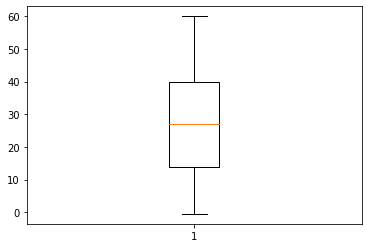

In [15]:
# Exploring Imcoming variable
plt.boxplot(demo_eda['Income'])
plt.plot()

27.0


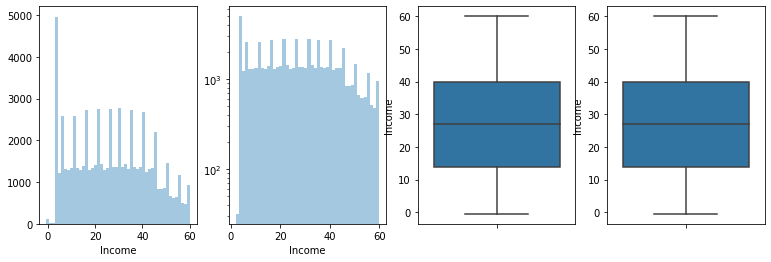

In [16]:
Global_Salesfig, axs = plt.subplots(ncols = 4, figsize=(13, 4))

sns.distplot(demo_eda.Income.dropna(), kde=False, ax=axs[0])
second_plt = sns.distplot(demo_eda.Income.dropna()[demo_eda.Income > 1], kde=False, ax=axs[1])
sns.boxplot(demo_eda.Income, ax=axs[2], orient = 'v')
sns.boxplot(demo_eda.Income, ax=axs[3], orient = 'v', showfliers=False)

second_plt.set_yscale('log')

print (demo_eda.loc[:,"Income"].median())

Median income of applicants is 27 units

45.0


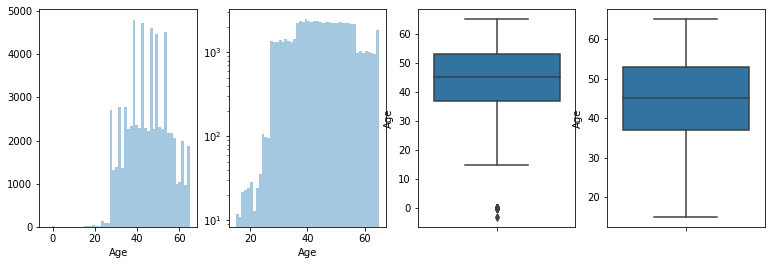

In [17]:
# Plotting Age

Global_Salesfig, axs = plt.subplots(ncols = 4, figsize=(13, 4))

sns.distplot(demo_eda.Age.dropna(), kde=False, ax=axs[0])
second_plt = sns.distplot(demo_eda.Age.dropna()[demo_eda.Age > 1], kde=False, ax=axs[1])
sns.boxplot(demo_eda.Age, ax=axs[2], orient = 'v')
sns.boxplot(demo_eda.Age, ax=axs[3], orient = 'v', showfliers=False)

second_plt.set_yscale('log')

print (demo_eda.loc[:,"Age"].median())

Median Age of applicants is 45 years, there may be some outliers

10.0


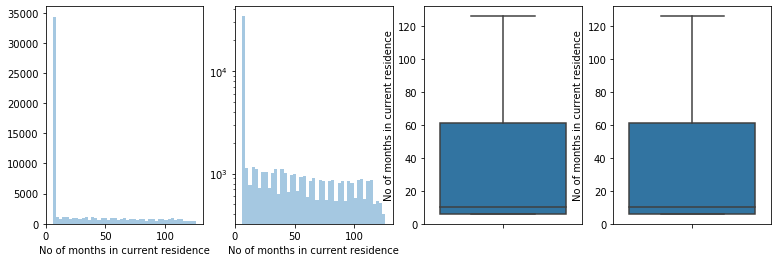

In [18]:
# Plotting current.residence

Global_Salesfig, axs = plt.subplots(ncols = 4, figsize=(13, 4))

sns.distplot(demo_eda['No of months in current residence'].dropna(), kde=False, ax=axs[0])
second_plt = sns.distplot(demo_eda['No of months in current residence'].dropna()[demo_eda.Age > 1], kde=False, ax=axs[1])
sns.boxplot(demo_eda['No of months in current residence'], ax=axs[2], orient = 'v')
sns.boxplot(demo_eda['No of months in current residence'], ax=axs[3], orient = 'v', showfliers=False)

second_plt.set_yscale('log')

print (demo_eda.loc[:,"No of months in current residence"].median())


Data Median is 10 months

34.0


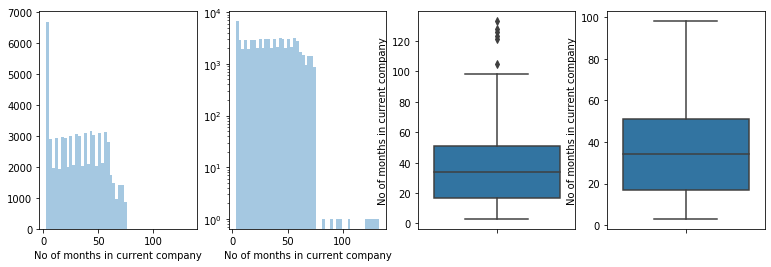

In [19]:
#Eda on current company

Global_Salesfig, axs = plt.subplots(ncols = 4, figsize=(13, 4))

sns.distplot(demo_eda['No of months in current company'].dropna(), kde=False, ax=axs[0])
second_plt = sns.distplot(demo_eda['No of months in current company'].dropna()[demo_eda.Age > 1], kde=False, ax=axs[1])
sns.boxplot(demo_eda['No of months in current company'], ax=axs[2], orient = 'v')
sns.boxplot(demo_eda['No of months in current company'], ax=axs[3], orient = 'v', showfliers=False)

second_plt.set_yscale('log')

print (demo_eda.loc[:,"No of months in current company"].median())


3.0


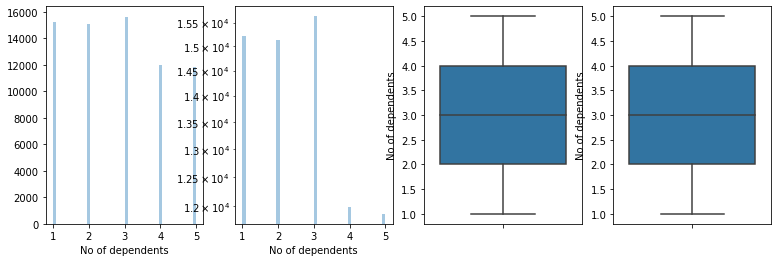

In [20]:
# On Depedant data

Global_Salesfig, axs = plt.subplots(ncols = 4, figsize=(13, 4))

sns.distplot(demo_eda['No of dependents'].dropna(), kde=False, ax=axs[0])
second_plt = sns.distplot(demo_eda['No of dependents'].dropna()[demo_eda.Age > 1], kde=False, ax=axs[1])
sns.boxplot(demo_eda['No of dependents'], ax=axs[2], orient = 'v')
sns.boxplot(demo_eda['No of dependents'], ax=axs[3], orient = 'v', showfliers=False)

second_plt.set_yscale('log')

print (demo_eda.loc[:,"No of dependents"].median())


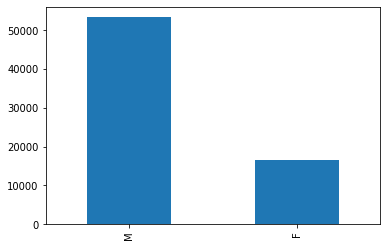

In [21]:
demo_eda['Gender'].value_counts().head(10).plot.bar()


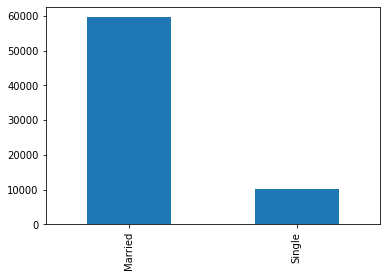

In [22]:
demo_eda['Marital Status (at the time of application)'].value_counts().head(10).plot.bar()

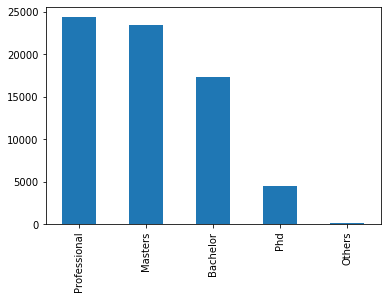

In [23]:
demo_eda['Education'].value_counts().head(10).plot.bar()

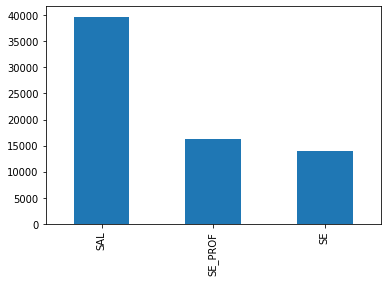

In [24]:
demo_eda = demo_eda.rename(columns = {"Profession ": "Profession"}) 
demo_eda['Profession'].value_counts().head(10).plot.bar()

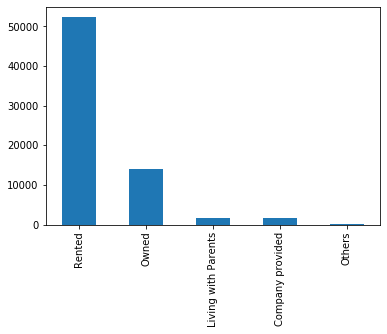

In [25]:
demo_eda['Type of residence'].value_counts().head(10).plot.bar()

Now We will perfrom Univariate on CreditBureu data

0.0


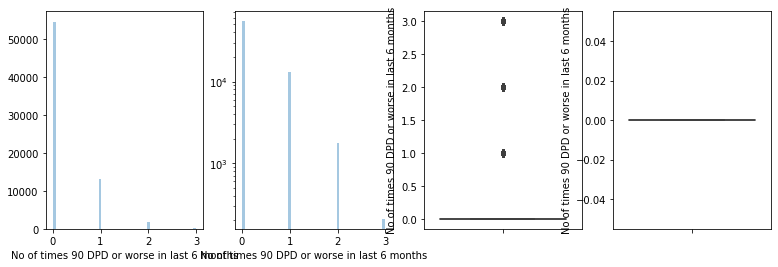

In [26]:
# 90 dps or worse
Global_Salesfig, axs = plt.subplots(ncols = 4, figsize=(13, 4))

sns.distplot(Credit_eda['No of times 90 DPD or worse in last 6 months'].dropna(), kde=False, ax=axs[0])
second_plt = sns.distplot(Credit_eda['No of times 90 DPD or worse in last 6 months'].dropna(), kde=False, ax=axs[1])
sns.boxplot(Credit_eda['No of times 90 DPD or worse in last 6 months'], ax=axs[2], orient = 'v')
sns.boxplot(Credit_eda['No of times 90 DPD or worse in last 6 months'], ax=axs[3], orient = 'v', showfliers=False)

second_plt.set_yscale('log')

print (Credit_eda.loc[:,"No of times 90 DPD or worse in last 6 months"].median())


0.0


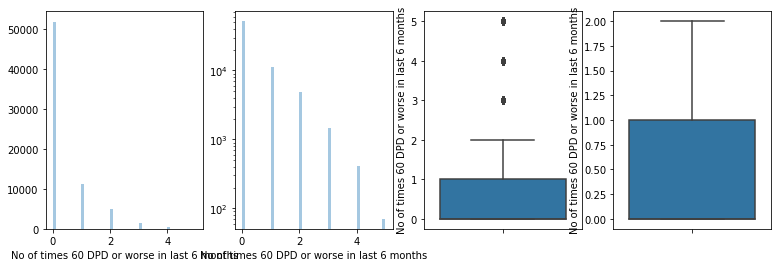

In [27]:
# No of times 60 DPD or worse in last 6 months

Global_Salesfig, axs = plt.subplots(ncols = 4, figsize=(13, 4))

sns.distplot(Credit_eda['No of times 60 DPD or worse in last 6 months'].dropna(), kde=False, ax=axs[0])
second_plt = sns.distplot(Credit_eda['No of times 60 DPD or worse in last 6 months'].dropna(), kde=False, ax=axs[1])
sns.boxplot(Credit_eda['No of times 60 DPD or worse in last 6 months'], ax=axs[2], orient = 'v')
sns.boxplot(Credit_eda['No of times 60 DPD or worse in last 6 months'], ax=axs[3], orient = 'v', showfliers=False)

second_plt.set_yscale('log')

print (Credit_eda.loc[:,"No of times 60 DPD or worse in last 6 months"].median())


0.0


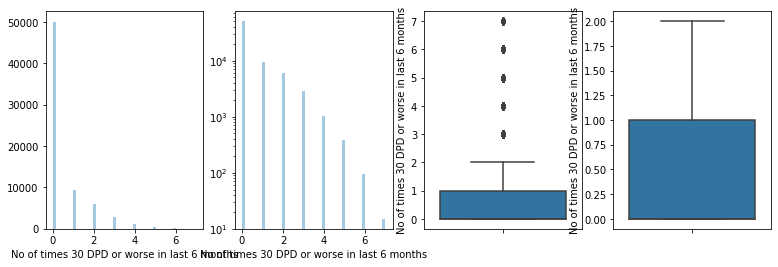

In [28]:
# No of times 30 DPD or worse in last 6 months

Global_Salesfig, axs = plt.subplots(ncols = 4, figsize=(13, 4))

sns.distplot(Credit_eda['No of times 30 DPD or worse in last 6 months'].dropna(), kde=False, ax=axs[0])
second_plt = sns.distplot(Credit_eda['No of times 30 DPD or worse in last 6 months'].dropna(), kde=False, ax=axs[1])
sns.boxplot(Credit_eda['No of times 30 DPD or worse in last 6 months'], ax=axs[2], orient = 'v')
sns.boxplot(Credit_eda['No of times 30 DPD or worse in last 6 months'], ax=axs[3], orient = 'v', showfliers=False)

second_plt.set_yscale('log')

print (Credit_eda.loc[:,"No of times 30 DPD or worse in last 6 months"].median())


0.0


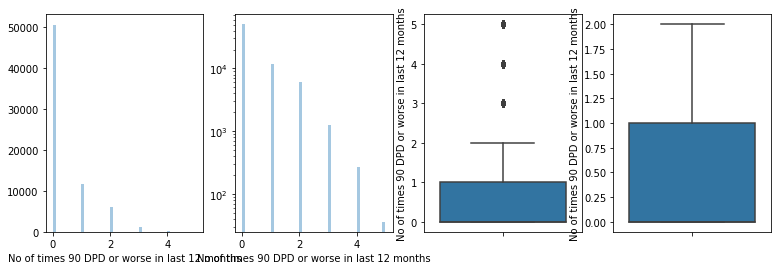

In [29]:
# No of times 90 DPD or worse in last 12 months

Global_Salesfig, axs = plt.subplots(ncols = 4, figsize=(13, 4))

sns.distplot(Credit_eda['No of times 90 DPD or worse in last 12 months'].dropna(), kde=False, ax=axs[0])
second_plt = sns.distplot(Credit_eda['No of times 90 DPD or worse in last 12 months'].dropna(), kde=False, ax=axs[1])
sns.boxplot(Credit_eda['No of times 90 DPD or worse in last 12 months'], ax=axs[2], orient = 'v')
sns.boxplot(Credit_eda['No of times 90 DPD or worse in last 12 months'], ax=axs[3], orient = 'v', showfliers=False)

second_plt.set_yscale('log')

print (Credit_eda.loc[:,"No of times 90 DPD or worse in last 12 months"].median())


0.0


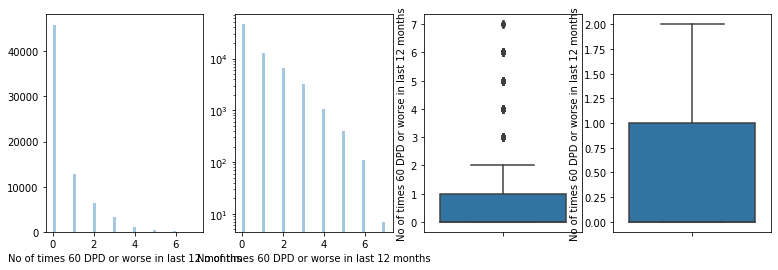

In [30]:
# No of times 60 DPD or worse in last 12 months

Global_Salesfig, axs = plt.subplots(ncols = 4, figsize=(13, 4))

sns.distplot(Credit_eda['No of times 60 DPD or worse in last 12 months'].dropna(), kde=False, ax=axs[0])
second_plt = sns.distplot(Credit_eda['No of times 60 DPD or worse in last 12 months'].dropna(), kde=False, ax=axs[1])
sns.boxplot(Credit_eda['No of times 60 DPD or worse in last 12 months'], ax=axs[2], orient = 'v')
sns.boxplot(Credit_eda['No of times 60 DPD or worse in last 12 months'], ax=axs[3], orient = 'v', showfliers=False)

second_plt.set_yscale('log')

print (Credit_eda.loc[:,"No of times 60 DPD or worse in last 12 months"].median())


0.0


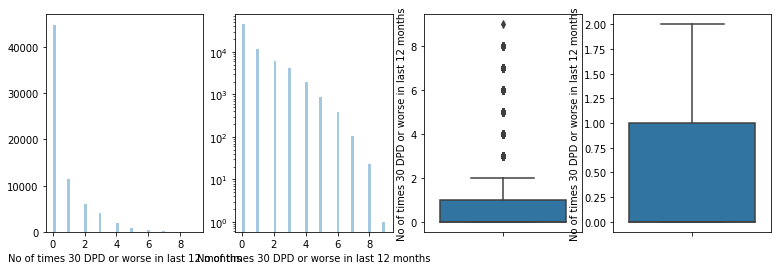

In [31]:
# No of times 90 DPD or worse in last 12 months

Global_Salesfig, axs = plt.subplots(ncols = 4, figsize=(13, 4))

sns.distplot(Credit_eda['No of times 30 DPD or worse in last 12 months'].dropna(), kde=False, ax=axs[0])
second_plt = sns.distplot(Credit_eda['No of times 30 DPD or worse in last 12 months'].dropna(), kde=False, ax=axs[1])
sns.boxplot(Credit_eda['No of times 30 DPD or worse in last 12 months'], ax=axs[2], orient = 'v')
sns.boxplot(Credit_eda['No of times 30 DPD or worse in last 12 months'], ax=axs[3], orient = 'v', showfliers=False)

second_plt.set_yscale('log')

print (Credit_eda.loc[:,"No of times 30 DPD or worse in last 12 months"].median())


15.0


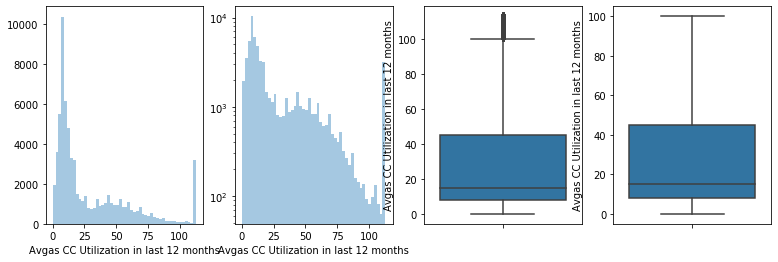

In [32]:
# Avgas CC Utilization in last 12 months
Global_Salesfig, axs = plt.subplots(ncols = 4, figsize=(13, 4))

sns.distplot(Credit_eda['Avgas CC Utilization in last 12 months'].dropna(), kde=False, ax=axs[0])
second_plt = sns.distplot(Credit_eda['Avgas CC Utilization in last 12 months'].dropna(), kde=False, ax=axs[1])
sns.boxplot(Credit_eda['Avgas CC Utilization in last 12 months'], ax=axs[2], orient = 'v')
sns.boxplot(Credit_eda['Avgas CC Utilization in last 12 months'], ax=axs[3], orient = 'v', showfliers=False)

second_plt.set_yscale('log')

print (Credit_eda.loc[:,"Avgas CC Utilization in last 12 months"].median())

2.0


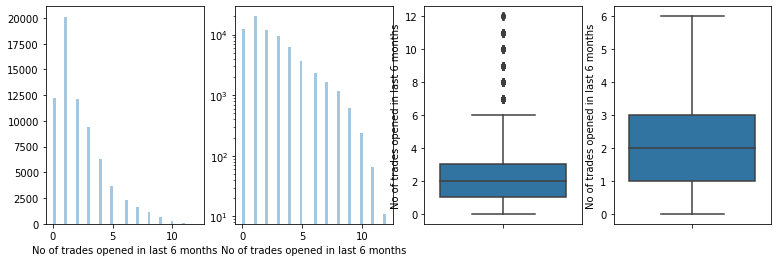

In [33]:
# No of trades opened in last 6 months
Global_Salesfig, axs = plt.subplots(ncols = 4, figsize=(13, 4))

sns.distplot(Credit_eda['No of trades opened in last 6 months'].dropna(), kde=False, ax=axs[0])
second_plt = sns.distplot(Credit_eda['No of trades opened in last 6 months'].dropna(), kde=False, ax=axs[1])
sns.boxplot(Credit_eda['No of trades opened in last 6 months'], ax=axs[2], orient = 'v')
sns.boxplot(Credit_eda['No of trades opened in last 6 months'], ax=axs[3], orient = 'v', showfliers=False)

second_plt.set_yscale('log')

print (Credit_eda.loc[:,"No of trades opened in last 6 months"].median())


4.0


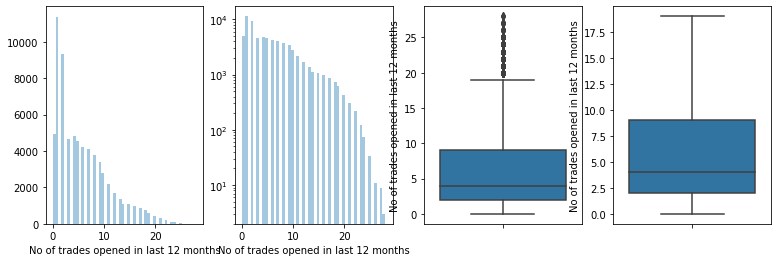

In [34]:
# No of trades opened in last 12 months
Global_Salesfig, axs = plt.subplots(ncols = 4, figsize=(13, 4))

sns.distplot(Credit_eda['No of trades opened in last 12 months'].dropna(), kde=False, ax=axs[0])
second_plt = sns.distplot(Credit_eda['No of trades opened in last 12 months'].dropna(), kde=False, ax=axs[1])
sns.boxplot(Credit_eda['No of trades opened in last 12 months'], ax=axs[2], orient = 'v')
sns.boxplot(Credit_eda['No of trades opened in last 12 months'], ax=axs[3], orient = 'v', showfliers=False)

second_plt.set_yscale('log')

print (Credit_eda.loc[:,"No of trades opened in last 12 months"].median())


6.0


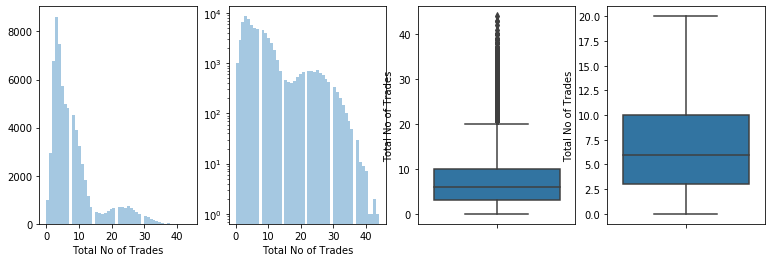

In [35]:
# Total No of Trades 
Global_Salesfig, axs = plt.subplots(ncols = 4, figsize=(13, 4))

sns.distplot(Credit_eda['Total No of Trades'].dropna(), kde=False, ax=axs[0])
second_plt = sns.distplot(Credit_eda['Total No of Trades'].dropna(), kde=False, ax=axs[1])
sns.boxplot(Credit_eda['Total No of Trades'], ax=axs[2], orient = 'v')
sns.boxplot(Credit_eda['Total No of Trades'], ax=axs[3], orient = 'v', showfliers=False)

second_plt.set_yscale('log')

print (Credit_eda.loc[:,"Total No of Trades"].median())

2.0


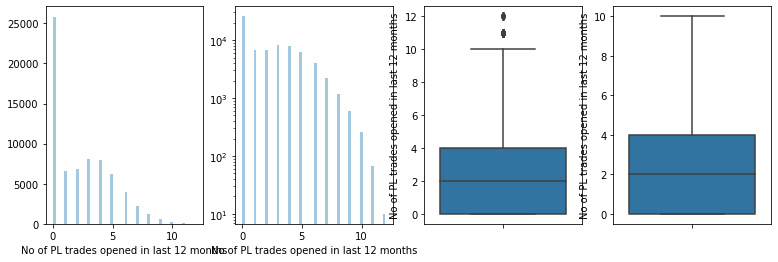

In [36]:
# No of PL trades opened in last 12 months

Global_Salesfig, axs = plt.subplots(ncols = 4, figsize=(13, 4))

sns.distplot(Credit_eda['No of PL trades opened in last 12 months'].dropna(), kde=False, ax=axs[0])
second_plt = sns.distplot(Credit_eda['No of PL trades opened in last 12 months'].dropna(), kde=False, ax=axs[1])
sns.boxplot(Credit_eda['No of PL trades opened in last 12 months'], ax=axs[2], orient = 'v')
sns.boxplot(Credit_eda['No of PL trades opened in last 12 months'], ax=axs[3], orient = 'v', showfliers=False)

second_plt.set_yscale('log')

print (Credit_eda.loc[:,"No of PL trades opened in last 12 months"].median())


1.0


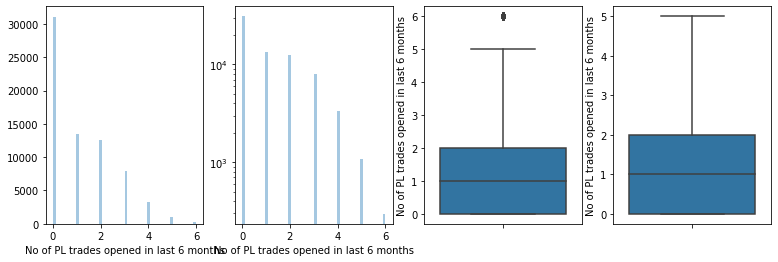

In [37]:
# No of PL trades opened in last 6 months

Global_Salesfig, axs = plt.subplots(ncols = 4, figsize=(13, 4))

sns.distplot(Credit_eda['No of PL trades opened in last 6 months'].dropna(), kde=False, ax=axs[0])
second_plt = sns.distplot(Credit_eda['No of PL trades opened in last 6 months'].dropna(), kde=False, ax=axs[1])
sns.boxplot(Credit_eda['No of PL trades opened in last 6 months'], ax=axs[2], orient = 'v')
sns.boxplot(Credit_eda['No of PL trades opened in last 6 months'], ax=axs[3], orient = 'v', showfliers=False)

second_plt.set_yscale('log')

print (Credit_eda.loc[:,"No of PL trades opened in last 6 months"].median())


1.0


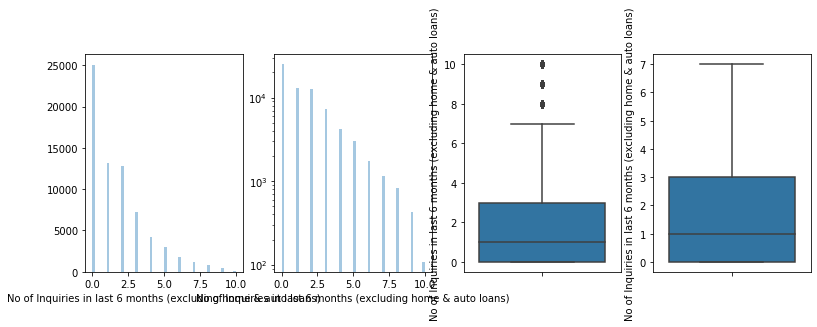

In [38]:
#No of Inquiries in last 6 months  excluding home   auto loans 
Global_Salesfig, axs = plt.subplots(ncols = 4, figsize=(13, 4))

sns.distplot(Credit_eda['No of Inquiries in last 6 months (excluding home & auto loans)'].dropna(), kde=False, ax=axs[0])
second_plt = sns.distplot(Credit_eda['No of Inquiries in last 6 months (excluding home & auto loans)'].dropna(), kde=False, ax=axs[1])
sns.boxplot(Credit_eda['No of Inquiries in last 6 months (excluding home & auto loans)'], ax=axs[2], orient = 'v')
sns.boxplot(Credit_eda['No of Inquiries in last 6 months (excluding home & auto loans)'], ax=axs[3], orient = 'v', showfliers=False)

second_plt.set_yscale('log')

print (Credit_eda.loc[:,"No of Inquiries in last 6 months (excluding home & auto loans)"].median())


3.0


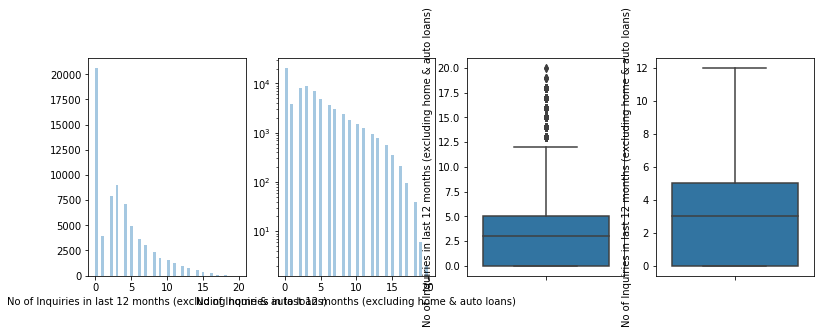

In [39]:
#No of Inquiries in last 12 months  excluding home   auto loans 
Global_Salesfig, axs = plt.subplots(ncols = 4, figsize=(13, 4))

sns.distplot(Credit_eda['No of Inquiries in last 12 months (excluding home & auto loans)'].dropna(), kde=False, ax=axs[0])
second_plt = sns.distplot(Credit_eda['No of Inquiries in last 12 months (excluding home & auto loans)'].dropna(), kde=False, ax=axs[1])
sns.boxplot(Credit_eda['No of Inquiries in last 12 months (excluding home & auto loans)'], ax=axs[2], orient = 'v')
sns.boxplot(Credit_eda['No of Inquiries in last 12 months (excluding home & auto loans)'], ax=axs[3], orient = 'v', showfliers=False)

second_plt.set_yscale('log')

print (Credit_eda.loc[:,"No of Inquiries in last 12 months (excluding home & auto loans)"].median())


774241.0


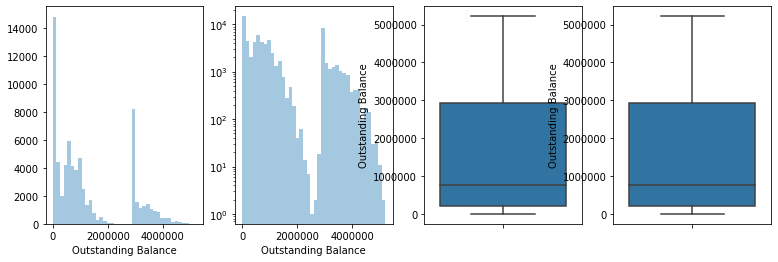

In [40]:
#Outstanding Balance
Global_Salesfig, axs = plt.subplots(ncols = 4, figsize=(13, 4))

sns.distplot(Credit_eda['Outstanding Balance'].dropna(), kde=False, ax=axs[0])
second_plt = sns.distplot(Credit_eda['Outstanding Balance'].dropna(), kde=False, ax=axs[1])
sns.boxplot(Credit_eda['Outstanding Balance'], ax=axs[2], orient = 'v')
sns.boxplot(Credit_eda['Outstanding Balance'], ax=axs[3], orient = 'v', showfliers=False)

second_plt.set_yscale('log')

print (Credit_eda.loc[:,"Outstanding Balance"].median())


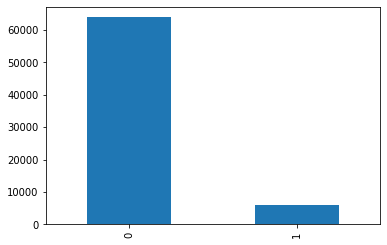

In [41]:
# Open Auto loan
Credit_eda['Presence of open auto loan'].value_counts().head(10).plot.bar()

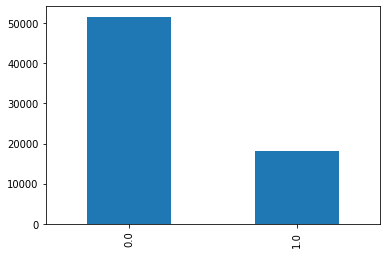

In [42]:
# Open Home Loan
Credit_eda['Presence of open home loan'].value_counts().head(10).plot.bar()

### BIVARIATE ANALYSIS

Let perform first on demographic data


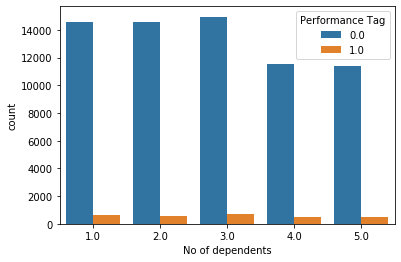

In [43]:
# Bivariate on no of dependents
plot = sns.countplot(data=demo_eda, x = 'No of dependents',hue = 'Performance Tag')

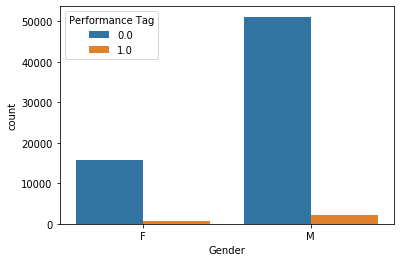

In [44]:
# Gender Vs Default tag
plot = sns.countplot(data=demo_eda, x = 'Gender',hue = 'Performance Tag')

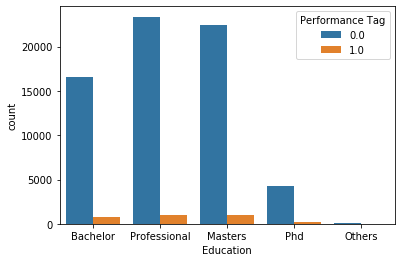

In [45]:
# Education
plot = sns.countplot(data=demo_eda, x = 'Education',hue = 'Performance Tag')

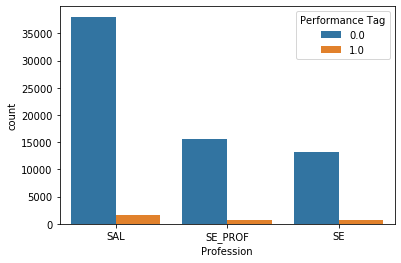

In [46]:
# Profession wise
demo_eda = demo_eda.rename(columns = {"Profession ": "Profession"})
plot = sns.countplot(data=demo_eda, x = 'Profession',hue = 'Performance Tag')

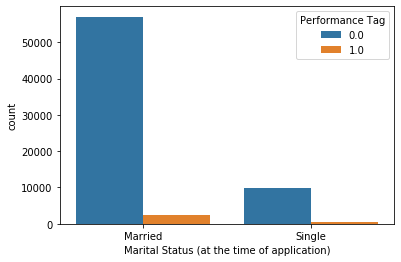

In [47]:
# Martial Status
plot = sns.countplot(data=demo_eda, x = 'Marital Status (at the time of application)',hue = 'Performance Tag')

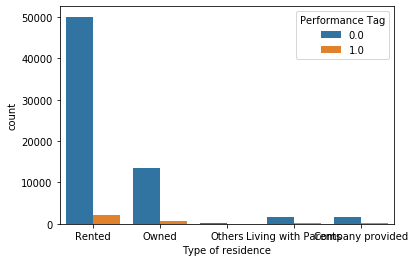

In [48]:
# Resdience Property
plot = sns.countplot(data=demo_eda, x = 'Type of residence',hue = 'Performance Tag')

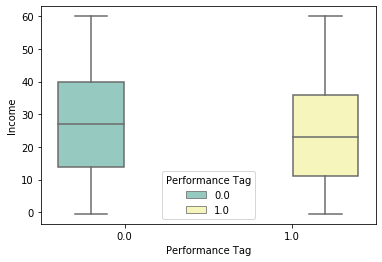

In [49]:
# Income wise
plot = sns.boxplot(x="Performance Tag", y="Income", hue="Performance Tag", data=demo_eda, palette="Set3")

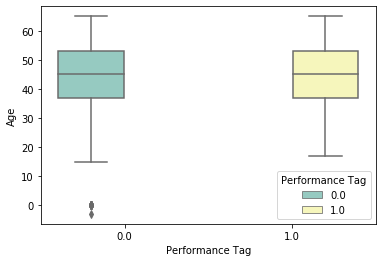

In [50]:
# Age
plot = sns.boxplot(x="Performance Tag", y="Age", hue="Performance Tag", data=demo_eda, palette="Set3")

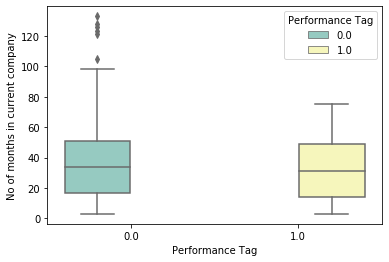

In [51]:
# Aging in current company
plot = sns.boxplot(x="Performance Tag", y="No of months in current company", hue="Performance Tag", data=demo_eda, palette="Set3")

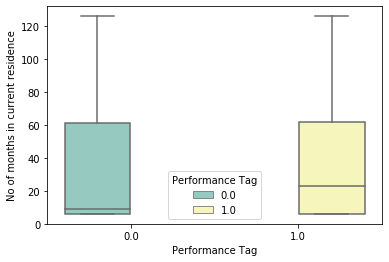

In [52]:
# Aging in curr residence
plot = sns.boxplot(x="Performance Tag", y="No of months in current residence", hue="Performance Tag", data=demo_eda, palette="Set3")


#### Let perform bivariate nowp = sns.countplot(data=Credit_eda, x = 'No of times 90 DPD or worse in last 6 months',hue = 'Performance Tag') on Credit data

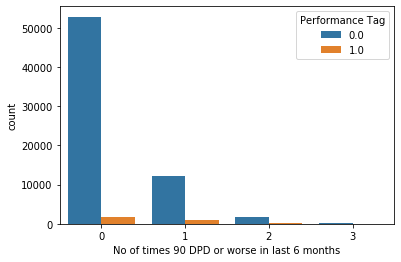

In [53]:
plot = sns.countplot(data=Credit_eda, x = 'No of times 90 DPD or worse in last 6 months',hue = 'Performance Tag')

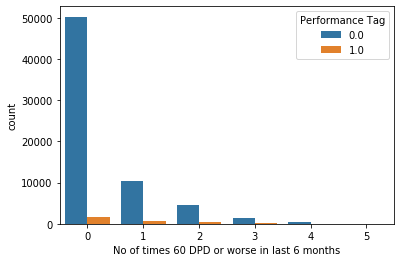

In [54]:
plot = sns.countplot(data=Credit_eda, x = 'No of times 60 DPD or worse in last 6 months',hue = 'Performance Tag')

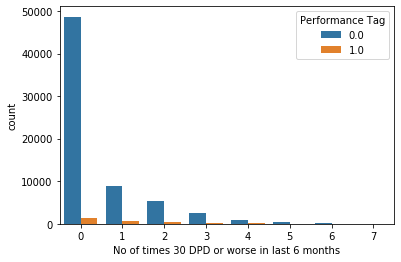

In [55]:
plot = sns.countplot(data=Credit_eda, x = 'No of times 30 DPD or worse in last 6 months',hue = 'Performance Tag')

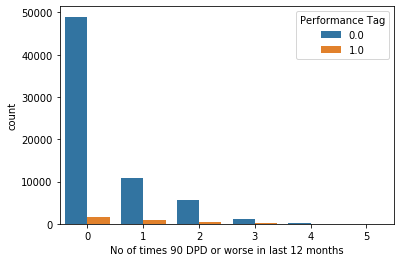

In [56]:
plot = sns.countplot(data=Credit_eda, x = 'No of times 90 DPD or worse in last 12 months',hue = 'Performance Tag')

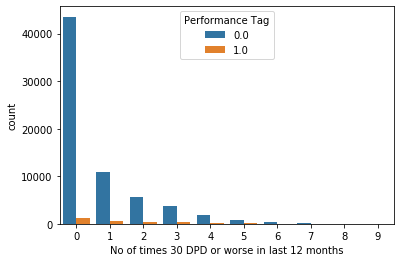

In [57]:
plot = sns.countplot(data=Credit_eda, x = 'No of times 30 DPD or worse in last 12 months',hue = 'Performance Tag')

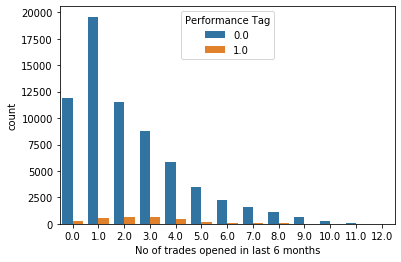

In [58]:
plot = sns.countplot(data=Credit_eda, x = 'No of trades opened in last 6 months',hue = 'Performance Tag')

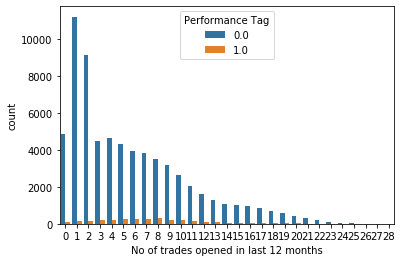

In [59]:
plot = sns.countplot(data=Credit_eda, x = 'No of trades opened in last 12 months',hue = 'Performance Tag')

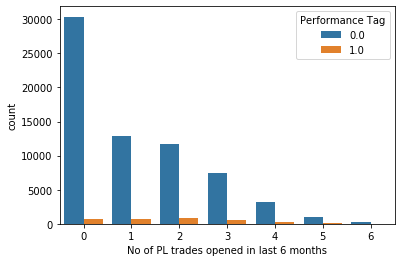

In [60]:
plot = sns.countplot(data=Credit_eda, x = 'No of PL trades opened in last 6 months',hue = 'Performance Tag')

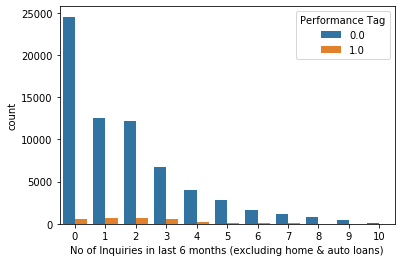

In [61]:
plot = sns.countplot(data=Credit_eda, x = 'No of Inquiries in last 6 months (excluding home & auto loans)',hue = 'Performance Tag')


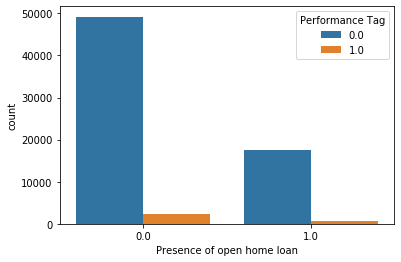

In [62]:
plot = sns.countplot(data=Credit_eda, x = 'Presence of open home loan',hue = 'Performance Tag')

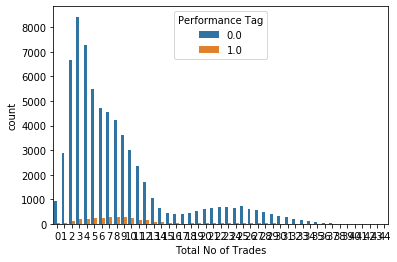

In [63]:
plot = sns.countplot(data=Credit_eda, x = 'Total No of Trades',hue = 'Performance Tag')

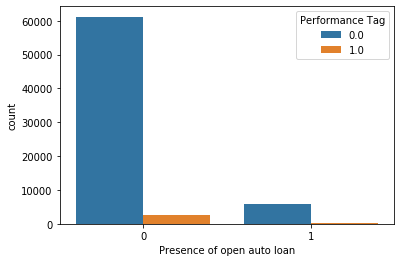

In [64]:
plot = sns.countplot(data=Credit_eda, x = 'Presence of open auto loan',hue = 'Performance Tag')

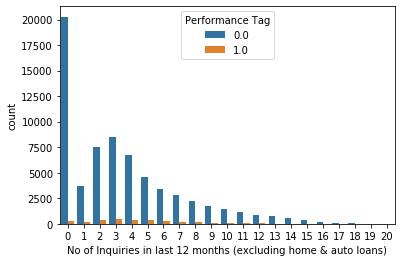

In [65]:
plot = sns.countplot(data=Credit_eda, x = 'No of Inquiries in last 12 months (excluding home & auto loans)',hue = 'Performance Tag')

### Findings from EDA:

  ##### 1. Below 3 variables seems to be significant from demographic data.
      #Income
      #No.of.months.in.current.residence
      #No.of.months.in.current.company

  ##### 2. Below variables seens to be significant to predict defaulters from credit bureau data
      #No.of.times.90.DPD.or.worse.in.last.6.months
      #No.of.times.60.DPD.or.worse.in.last.6.months
      #No.of.times.30.DPD.or.worse.in.last.6.months
      #No.of.times.90.DPD.or.worse.in.last.12.months
      #No.of.times.60.DPD.or.worse.in.last.12.months
      #No.of.times.30.DPD.or.worse.in.last.12.months
      #No.of.trades.opened.in.last.6.months
      #No.of.PL.trades.opened.in.last.6.months
      #No.of.PL.trades.opened.in.last.12.months

### Data Preparation

Once Exploratory Data anlysis has been performed, we move to data preparation for the purpose of modelling.

In [66]:
cb_data1 = CreditBureau
demo_data1 = demographics # Copying  for model building and later reference

In [67]:
# Application ID which are not common in both the Dataframes
cb_data1[~cb_data1['Application ID'].isin(demo_data1['Application ID'])]

,Application ID,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag


In [68]:
# Checking Unique values across column in CB dataset
from IPython.display import HTML
for col in list(cb_data1):
    print('\x1b[1;31m'+col+':\x1b[0m')
    print(cb_data1[col].unique())

Application ID:
[954457215 432830445 941387308 ...  32481239 704812159  37493797]
No of times 90 DPD or worse in last 6 months:
[0 1 2 3]
No of times 60 DPD or worse in last 6 months:
[0 1 2 3 4 5]
No of times 30 DPD or worse in last 6 months:
[0 1 2 3 4 5 6 7]
No of times 90 DPD or worse in last 12 months:
[0 1 2 3 4 5]
No of times 60 DPD or worse in last 12 months:
[0 1 2 3 4 5 6 7]
No of times 30 DPD or worse in last 12 months:
[0 1 2 3 4 5 6 7 8 9]
Avgas CC Utilization in last 12 months:
[  4.   3.   7.  11.  12.  10.  13.   9.   6.   5.   2.  14.   0.   8.
  nan  15.   1.  16.  19.  18.  17.  20.  26.  24.  23.  22.  21.  27.
  25.  28.  29. 113.  83. 111.  43. 103.  98.  97.  37.  45.  80.  57.
  94.  40.  34.  41. 105.  59.  81.  75.  56.  88.  70.  95.  65. 102.
  85. 112.  32.  73.  58. 104.  77.  35. 100.  49. 110.  96.  79.  68.
  90.  93.  33.  60. 106.  91.  64. 107.  72.  74. 101.  39.  71.  36.
  99.  38.  84.  86.  46.  50.  48.  51.  53.  42.  66.  78.  61.  44.
  54. 

In [69]:
# Checking Unique values across column in Demographic dataset
from IPython.display import HTML
for col in list(demo_data1):
    print('\x1b[1;31m'+col+':\x1b[0m')
    print(demo_data1[col].unique())

Application ID:
[954457215 432830445 941387308 ...  32481239 704812159  37493797]
Age:
[48 31 32 43 35 20 42 34 30 22 37 41 38 33 45 51 36 29 40 19 25 28 50 27
 26 49 47 39 17 44 23 46 52 53 24 18 15 21 16 64 56 55 60 59 54 58 62 65
 61 57 63  0 -3]
Gender:
['F' 'M' nan]
Marital Status (at the time of application):
['Married' 'Single' nan]
No of dependents:
[ 2.  4.  1.  5.  3. nan]
Income:
[40.  55.  46.  53.  44.  39.  49.  48.  38.  43.  51.  54.  50.  28.
 52.  27.  37.  36.  42.  32.  24.  25.  47.  31.  33.  35.  26.  34.
 41.  45.  13.  19.  29.  18.   7.  30.  23.  21.  14.   2.  22.   3.
  6.  15.  16.  20.  11.  17.  12.   5.   4.  10.   9.  -0.5  8.   1.
  0.   4.5 60.  57.  59.  58.  56. ]
Education:
['Bachelor' 'Professional' 'Masters' 'Phd' 'Others' nan]
Profession :
['SAL' 'SE_PROF' 'SE' nan]
Type of residence:
['Rented' nan 'Owned' 'Others' 'Living with Parents' 'Company provided']
No of months in current residence:
[113 112 104  94 116 108 115 111  90  83 106  81 100 1

In [70]:
### Getting a copy of the DF which we backedup
cb_data = cb_data1
demo_data = demo_data1

#### WOE and IV

In [71]:
# Function for Woe and IV - Code is Copied from online available resources
def iv_woe(data, target, bins=8, show_woe=False):
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>30):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF

In [72]:
# Function for Replacing Values in a particular Variable where the CutOff is Float/Integer
def replace_cat(data, cutOff, var, newVar, val):
    data[newVar] = np.where(data[var] == cutOff, val, data[newVar])                
    return data

In [73]:
# Function for Looping through each CutOff Value in categorical variable 
def replace_on_variables(var, data, woe):
    cutOff = list(woe.Cutoff[woe.Variable == var])
    val = list(woe.WoE[woe.Variable == var])
    newVar = var + '_woe'
    data[newVar] = 0
    for i in cutOff:
        data = replace_cat(data, cutOff[i], var, newVar, val[i])
    return data

In [74]:
# Function for Replacing Values in a particular Variable where cutOff is in Interval
def replace_cat_cont(data, cutOff, var, newVar, val):
    cutOff_l = cutOff.left
    cutOff_r = cutOff.right
    data[newVar] = np.where(data[var].between(cutOff_l, cutOff_r), val, data[newVar])
    return data

In [75]:
# Function for Looping through each CutOff Interval
def replace_on_variables_cont(var, data, woe):
    cutOff = woe.Cutoff[woe.Variable == var]
    count = woe.Cutoff[woe.Variable == var].count()
    val = list(woe.WoE[woe.Variable == var])
    newVar = var + '_woe'
    data[newVar] = 0
    for i in range(count):
        data = replace_cat_cont(data, cutOff[i], var, newVar, val[i])
    return data

### Model Building : Demographic Data (as asked in Problem Statement)

In [76]:
# Droping the Application ID and then calling the WOE and IV Function
demo_data = demo_data.drop('Application ID', axis=1)

In [77]:
# Create a new DF with WOE and IV from the Combined DataFrame DataFrame
iv_masterDemo, woe_masterDemo = iv_woe(data = demo_data, target = 'Performance Tag', bins=10, show_woe = True)
iv_masterDemo


Information value of Age is 0.004169
  Variable          Cutoff     N  Events  % of Events  Non-Events  \
0      Age  (-3.001, 31.0]  7272   302.0     0.102442      6970.0   
1      Age    (31.0, 36.0]  7866   342.0     0.116011      7524.0   
2      Age    (36.0, 39.0]  7146   320.0     0.108548      6826.0   
3      Age    (39.0, 42.0]  7003   310.0     0.105156      6693.0   
4      Age    (42.0, 45.0]  6879   278.0     0.094301      6601.0   
5      Age    (45.0, 48.0]  6869   299.0     0.101425      6570.0   
6      Age    (48.0, 51.0]  6791   267.0     0.090570      6524.0   
7      Age    (51.0, 54.0]  6786   248.0     0.084125      6538.0   
8      Age    (54.0, 58.0]  6407   290.0     0.098372      6117.0   
9      Age    (58.0, 65.0]  6848   292.0     0.099050      6556.0   

   % of Non-Events       WoE        IV  
0         0.104156 -0.016588  0.000028  
1         0.112434  0.031314  0.000112  
2         0.102004  0.062183  0.000407  
3         0.100016  0.050111  0.000258 

,Variable,IV
0,Age,0.004169
0,Gender,0.000319
0,Marital Status (at the time of application),0.000093
0,No of dependents,0.002657
0,Income,0.042842
0,Education,0.000767
0,Profession,0.002276
0,Type of residence,0.000921
0,No of months in current residence,0.070893
0,No of months in current company,0.022707


In [78]:
# Printing the IV Score of the Variables
iv_masterDemo[['Variable','IV']]


,Variable,IV
0,Age,0.004169
0,Gender,0.000319
0,Marital Status (at the time of application),0.000093
0,No of dependents,0.002657
0,Income,0.042842
0,Education,0.000767
0,Profession,0.002276
0,Type of residence,0.000921
0,No of months in current residence,0.070893
0,No of months in current company,0.022707


In [79]:
# Getting the Variables name with less than .02 IV as they do not affect the decision making significantly
low_DemoIV_Cols = iv_masterDemo.loc[iv_masterDemo.IV < 0.02]
low_DemoIV_Cols

,Variable,IV
0,Age,0.004169
0,Gender,0.000319
0,Marital Status (at the time of application),0.000093
0,No of dependents,0.002657
0,Education,0.000767
0,Profession,0.002276
0,Type of residence,0.000921


In [80]:
demo_data = demo_data.drop(low_DemoIV_Cols.Variable, axis=1)
demo_data.columns

Index(['Income', 'No of months in current residence',
       'No of months in current company', 'Performance Tag'],
      dtype='object')

In [81]:
# WOE Values from the WOE Values
woe_masterDemo.groupby('Variable').count()

,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
Variable,,,,,,,,
Age,10,10,10,10,10,10,10,10
Education,5,5,5,5,5,5,5,5
Gender,2,2,2,2,2,2,2,2
Income,10,10,10,10,10,10,10,10
Marital Status (at the time of application),2,2,2,2,2,2,2,2
No of dependents,5,5,5,5,5,5,5,5
No of months in current company,10,10,10,10,10,10,10,10
No of months in current residence,6,6,6,6,6,6,6,6
Profession,3,3,3,3,3,3,3,3


In [82]:
# Taking Variables one by one and keeping the Column name in a different List
demo_data = replace_on_variables_cont('No of months in current residence', demo_data, woe_masterDemo)
Cols_to_removeDemo = ["No of months in current residence"]

In [83]:
# Taking Variables one by one and keeping the Column name in a different List
demo_data = replace_on_variables_cont('No of months in current company', demo_data, woe_masterDemo)
Cols_to_removeDemo.append("No of months in current company")

In [84]:
### Taking Variables one by one and keeping the Column name in a different List
demo_data = replace_on_variables_cont('Income', demo_data, woe_masterDemo)
Cols_to_removeDemo.append("Income")

In [85]:
demo_data = demo_data.drop(Cols_to_removeDemo, axis=1)
demo_data

,Performance Tag,No of months in current residence_woe,No of months in current company_woe,Income_woe
0,0.0,-0.069491,-0.229105,-0.273218
1,0.0,-0.069491,-0.145849,-0.385850
2,0.0,-0.069491,-0.255198,-0.169700
3,0.0,0.121151,-0.255198,-0.385850
4,0.0,-0.069491,-0.145849,-0.169700
...,...,...,...,...
71290,0.0,-0.253229,0.101657,0.078752
71291,1.0,0.472881,0.182979,0.352682
71292,0.0,0.304993,0.000570,0.139283
71293,0.0,0.121151,-0.229105,0.352682


In [86]:
# Putting feature variable to X
X = demo_data.drop(['Performance Tag'],axis=1)

# Putting response variable to y
y = demo_data['Performance Tag']

In [87]:
# Import library to split the dataset into test and train
from sklearn.model_selection import train_test_split
### Split DataSet
X_train_res, X_test_res, y_train_res, y_test_pd = train_test_split(X,y, train_size=0.70,test_size=0.30,random_state=100)
### Using SMOTEEN for treating the Class Imbalance
from imblearn.combine import SMOTEENN
sm = SMOTEENN(random_state = 101)
X_train_res,y_train_res = sm.fit_sample(X_train_res, y_train_res.ravel())

In [88]:
X_train_DM  = pd.DataFrame(X_train_res)
y_train_DM  = pd.DataFrame(y_train_res)
X_test_DM = pd.DataFrame(X_test_res)
y_test_DM = pd.DataFrame(y_test_pd)

In [89]:
X_train_DM.columns = X.columns
X_test_DM.columns = X.columns

In [90]:
y_train_DM

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
35801,1.0
35802,1.0
35803,1.0
35804,1.0


In [91]:
# grid search CV
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
### Using GridSearchCV for getting the Optimum Model Parameters
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

solver_options = ['newton-cg', 'lbfgs', 'liblinear', 'sag']
multi_class_options = ['ovr']
class_weight_options = ['balanced']

lr1 = LogisticRegression()

param_grid = dict(solver = solver_options, multi_class = multi_class_options, class_weight = class_weight_options) 

model_cv = GridSearchCV(lr1, param_grid, cv=5, return_train_score = True, scoring = 'accuracy')
model_cv.fit(X_train_DM, y_train_DM) 


C:\Users\ADMIN\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ADMIN\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ADMIN\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ADMIN\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when 

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'class_weight': ['balanced'], 'multi_class': ['ovr'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=0)

In [92]:
# scores of GridSearch CV
scores = model_cv.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_multi_class,param_solver,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.120736,0.066365,0.002799,0.000748,balanced,ovr,newton-cg,"{'class_weight': 'balanced', 'multi_class': 'o...",0.649818,0.642558,...,0.650673,0.009769,3,0.651061,0.656263,0.650433,0.651958,0.646129,0.651169,0.003241
1,0.072897,0.046437,0.002598,0.000490,balanced,ovr,lbfgs,"{'class_weight': 'balanced', 'multi_class': 'o...",0.649818,0.642558,...,0.650673,0.009769,3,0.651061,0.656263,0.650433,0.651958,0.646129,0.651169,0.003241
2,0.059565,0.026931,0.003196,0.000402,balanced,ovr,liblinear,"{'class_weight': 'balanced', 'multi_class': 'o...",0.649958,0.642558,...,0.650701,0.009767,2,0.651131,0.656298,0.650468,0.651958,0.646129,0.651197,0.003250
3,0.190103,0.032753,0.002200,0.000399,balanced,ovr,sag,"{'class_weight': 'balanced', 'multi_class': 'o...",0.649958,0.642698,...,0.650729,0.009744,1,0.651341,0.656438,0.650398,0.651958,0.646164,0.651260,0.003287


In [93]:
# Hyperparameters
print('Best Penalty:', model_cv.best_estimator_.get_params()['penalty'])
print('Best C:', model_cv.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 1.0


In [94]:
pd.DataFrame(scores)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_multi_class,param_solver,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.120736,0.066365,0.002799,0.000748,balanced,ovr,newton-cg,"{'class_weight': 'balanced', 'multi_class': 'o...",0.649818,0.642558,...,0.650673,0.009769,3,0.651061,0.656263,0.650433,0.651958,0.646129,0.651169,0.003241
1,0.072897,0.046437,0.002598,0.000490,balanced,ovr,lbfgs,"{'class_weight': 'balanced', 'multi_class': 'o...",0.649818,0.642558,...,0.650673,0.009769,3,0.651061,0.656263,0.650433,0.651958,0.646129,0.651169,0.003241
2,0.059565,0.026931,0.003196,0.000402,balanced,ovr,liblinear,"{'class_weight': 'balanced', 'multi_class': 'o...",0.649958,0.642558,...,0.650701,0.009767,2,0.651131,0.656298,0.650468,0.651958,0.646129,0.651197,0.003250
3,0.190103,0.032753,0.002200,0.000399,balanced,ovr,sag,"{'class_weight': 'balanced', 'multi_class': 'o...",0.649958,0.642698,...,0.650729,0.009744,1,0.651341,0.656438,0.650398,0.651958,0.646164,0.651260,0.003287


In [95]:
# Build the Logistic Regression with the Best Estimator
lr1 = model_cv.best_estimator_
lr1 = lr1.fit(X_train_DM, y_train_DM)

C:\Users\ADMIN\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [96]:
# Prediction on the X Train_DM dataframe
y_train_predDM = lr1.predict(X_train_DM)

y_train_predDM[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [97]:
y_train_pred_finalDM = pd.DataFrame({'Performance Tag':y_train_DM[0], 'Predicted':y_train_predDM})
y_train_pred_finalDM

,Performance Tag,Predicted
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
35801,1.0,0.0
35802,1.0,1.0
35803,1.0,1.0
35804,1.0,0.0


In [98]:
# Function for Printing out Confusion Matrix - Taken codes for confusion matrics from online resources
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall metric in the train dataset: 65.37022774782704%


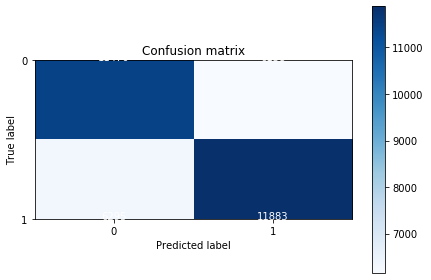

In [99]:
# Confusion Matrix 
from sklearn import metrics

confussionDemo = metrics.confusion_matrix(y_train_pred_finalDM['Performance Tag'], y_train_pred_finalDM.Predicted )

print("Recall metric in the train dataset: {}%".format(100*confussionDemo[1,1]/(confussionDemo[1,0]+confussionDemo[1,1])))


class_names = [0,1]
plt.figure()
plot_confusion_matrix(confussionDemo , classes=class_names, title='Confusion matrix')
plt.show()

In [100]:
# Accuracy
print(metrics.accuracy_score(y_train_pred_finalDM['Performance Tag'], y_train_pred_finalDM.Predicted))

0.6522091269619616


In [101]:
TP = confussionDemo[1,1] # true positive 
TN = confussionDemo[0,0] # true negatives
FP = confussionDemo[0,1] # false positives
FN = confussionDemo[1,0] # false negatives

In [102]:
# Sensitivity
TP / float(TP+FN)

0.6537022774782705

In [103]:
# Specificity
TN / float(TN+FP)

0.6506693896074427

##### The ROC Curve

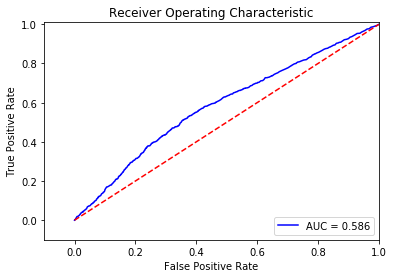

In [104]:
#### Printing the ROC Curve for Train Data
tmp = lr1
y_pred_sample_score = tmp.decision_function(X_test_DM)


fpr, tpr, thresholds = roc_curve(y_test_DM, y_pred_sample_score)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [105]:
# Precision
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_pred_finalDM['Performance Tag'], y_train_pred_finalDM.Predicted)


0.6586663710437337

In [106]:
# Recall
recall_score(y_train_pred_finalDM['Performance Tag'], y_train_pred_finalDM.Predicted)

0.6537022774782705

In [107]:
# Predcition on the Test Data and Printing the Confusion Matrix
y_pre = lr1.predict(X_test_DM)

cnf_matrix = confusion_matrix(y_test_DM, y_pre)

print("Total Accuracy: ", metrics.accuracy_score(y_test_DM, y_pre))
print("Recall metric in the testing dataset: {}%".format(100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))
print("Precision metric in the testing dataset: {}%".format(100*cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0])))


Total Accuracy:  0.6643766995849435
Recall metric in the testing dataset: 47.20638540478905%
Precision metric in the testing dataset: 96.68694096601074%


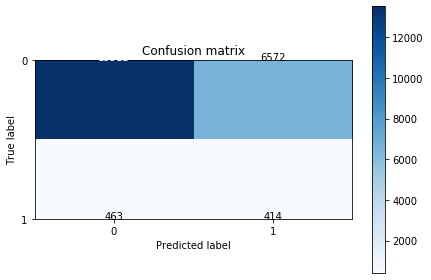

In [108]:
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
plt.show()

In [109]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test_DM, y_pre))


              precision    recall  f1-score   support

         0.0       0.97      0.67      0.79     20084
         1.0       0.06      0.47      0.11       877

    accuracy                           0.66     20961
   macro avg       0.51      0.57      0.45     20961
weighted avg       0.93      0.66      0.76     20961



Since alone DemoGraphic Dataset is not very much helpful in Predictions, we will build model on combined dataset of Demographic and Creditbureu

### Model Building : Combined Data

In [110]:
# Creating backup of the datasets for later use
cb_data = cb_data1
demo_data = demo_data1

In [111]:
# Creating Master dataframe by combining both demographic and credit bureu dataframe
master_df = pd.merge(cb_data, demo_data, on='Application ID', how='inner')
print("Size of the new DF is: ",master_df.shape)
master_df.head()

Size of the new DF is:  (69867, 30)


,Application ID,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,...,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag_y
0,954457215,0,0,0,0,0,0,4.0,1.0,2,...,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,56,0.0
1,432830445,0,0,0,0,0,0,3.0,1.0,2,...,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,46,0.0
2,941387308,0,0,0,0,0,0,7.0,0.0,0,...,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,49,0.0
3,392161677,0,0,0,0,0,0,11.0,1.0,1,...,M,Married,1.0,53.0,Bachelor,SE,Rented,94,53,0.0
4,182011211,0,0,0,0,0,0,12.0,0.0,1,...,F,Married,5.0,44.0,Professional,SAL,Rented,112,43,0.0


In [112]:
# Dropping one of the performace tag column
master_df = master_df.drop('Performance Tag_x', axis=1)

    # Renaming remaining Performance tag column for ease of understanding
master_df.rename(columns={'Performance Tag_y': 'Performance Tag'}, inplace=True)
master_df.head()

,Application ID,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,...,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag
0,954457215,0,0,0,0,0,0,4.0,1.0,2,...,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,56,0.0
1,432830445,0,0,0,0,0,0,3.0,1.0,2,...,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,46,0.0
2,941387308,0,0,0,0,0,0,7.0,0.0,0,...,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,49,0.0
3,392161677,0,0,0,0,0,0,11.0,1.0,1,...,M,Married,1.0,53.0,Bachelor,SE,Rented,94,53,0.0
4,182011211,0,0,0,0,0,0,12.0,0.0,1,...,F,Married,5.0,44.0,Professional,SAL,Rented,112,43,0.0


In [113]:
master_df.shape

(69867, 29)

In [114]:
# Creating new DF with WOE and IV
iv_master, woe_master = iv_woe(data = master_df, target = 'Performance Tag', bins=10, show_woe = True)
iv_master

Information value of Application ID is 0.001487
         Variable                       Cutoff     N  Events  % of Events  \
0  Application ID     (100449.999, 99490857.8]  6987   292.0     0.099050   
1  Application ID    (99490857.8, 199470441.0]  6987   276.0     0.093623   
2  Application ID   (199470441.0, 298569304.0]  6986   305.0     0.103460   
3  Application ID   (298569304.0, 399380461.8]  6987   295.0     0.100068   
4  Application ID   (399380461.8, 498001549.0]  6987   312.0     0.105834   
5  Application ID   (498001549.0, 599104434.0]  6986   281.0     0.095319   
6  Application ID   (599104434.0, 699936232.0]  6987   298.0     0.101085   
7  Application ID   (699936232.0, 798890216.0]  6986   305.0     0.103460   
8  Application ID   (798890216.0, 899541680.4]  6987   285.0     0.096676   
9  Application ID  (899541680.4, 1000084142.0]  6987   299.0     0.101425   

   Non-Events  % of Non-Events       WoE            IV  
0      6695.0         0.100046 -0.010006  9.967

Information value of No of PL trades opened in last 6 months is 0.22432
                                  Variable  Cutoff      N  Events  \
0  No of PL trades opened in last 6 months       0  31079   699.0   
1  No of PL trades opened in last 6 months       1  13547   692.0   
2  No of PL trades opened in last 6 months       2  12565   803.0   
3  No of PL trades opened in last 6 months       3   7949   501.0   
4  No of PL trades opened in last 6 months       4   3341   197.0   
5  No of PL trades opened in last 6 months       5   1090    48.0   
6  No of PL trades opened in last 6 months       6    296     8.0   

   % of Events  Non-Events  % of Non-Events       WoE        IV  
0     0.237110     30380.0         0.453982 -0.649533  0.140865  
1     0.234735     12855.0         0.192098  0.200454  0.008547  
2     0.272388     11762.0         0.175765  0.438081  0.042329  
3     0.169946      7448.0         0.111299  0.423261  0.024823  
4     0.066825      3144.0         0.046982  

Information value of Outstanding Balance is 0.246913
              Variable                  Cutoff     N  Events  % of Events  \
0  Outstanding Balance        (-0.001, 6847.4]  6960   139.0     0.047279   
1  Outstanding Balance       (6847.4, 25531.4]  6959   120.0     0.040816   
2  Outstanding Balance     (25531.4, 386845.2]  6960   258.0     0.087755   
3  Outstanding Balance    (386845.2, 585463.2]  6959   374.0     0.127211   
4  Outstanding Balance    (585463.2, 774241.0]  6960   452.0     0.153741   
5  Outstanding Balance    (774241.0, 972456.8]  6959   443.0     0.150680   
6  Outstanding Balance   (972456.8, 1357415.0]  6959   431.0     0.146599   
7  Outstanding Balance  (1357415.0, 2961005.4]  6960   203.0     0.069048   
8  Outstanding Balance  (2961005.4, 3282371.0]  6959   131.0     0.044558   
9  Outstanding Balance  (3282371.0, 5218801.0]  6960   389.0     0.132313   

   Non-Events  % of Non-Events       WoE        IV  
0      6821.0         0.102333 -0.772167  0.04

2         0.232849 -0.013846  0.000044  
Information value of Type of residence is 0.000921
            Variable               Cutoff      N  Events  % of Events  \
0  Type of residence     Company provided   1602    73.0     0.024763   
1  Type of residence  Living with Parents   1777    80.0     0.027137   
2  Type of residence               Others    198     5.0     0.001696   
3  Type of residence                Owned  14003   593.0     0.201153   
4  Type of residence               Rented  52279  2197.0     0.745251   

   Non-Events  % of Non-Events       WoE        IV  
0      1529.0         0.022851  0.080327  0.000154  
1      1697.0         0.025362  0.067646  0.000120  
2       193.0         0.002884 -0.531016  0.000631  
3     13410.0         0.200415  0.003675  0.000003  
4     50082.0         0.748487 -0.004332  0.000014  
Information value of No of months in current residence is 0.070893
                            Variable         Cutoff      N  Events  \
0  No of month

,Variable,IV
0,Application ID,0.001487
0,No of times 90 DPD or worse in last 6 months,0.162992
0,No of times 60 DPD or worse in last 6 months,0.211549
0,No of times 30 DPD or worse in last 6 months,0.244473
0,No of times 90 DPD or worse in last 12 months,0.216024
0,No of times 60 DPD or worse in last 12 months,0.188546
0,No of times 30 DPD or worse in last 12 months,0.218904
0,Avgas CC Utilization in last 12 months,0.322034
0,No of trades opened in last 6 months,0.191581
0,No of trades opened in last 12 months,0.308075


In [115]:
iv_master[['Variable','IV']]

,Variable,IV
0,Application ID,0.001487
0,No of times 90 DPD or worse in last 6 months,0.162992
0,No of times 60 DPD or worse in last 6 months,0.211549
0,No of times 30 DPD or worse in last 6 months,0.244473
0,No of times 90 DPD or worse in last 12 months,0.216024
0,No of times 60 DPD or worse in last 12 months,0.188546
0,No of times 30 DPD or worse in last 12 months,0.218904
0,Avgas CC Utilization in last 12 months,0.322034
0,No of trades opened in last 6 months,0.191581
0,No of trades opened in last 12 months,0.308075


In [116]:
# Getting only those Variables name with less than .02 IV Value
low_IV_Cols = iv_master.loc[iv_master.IV < 0.02]
low_IV_Cols

,Variable,IV
0,Application ID,0.001487
0,Presence of open home loan,0.000000
0,Presence of open auto loan,0.001662
0,Age,0.004169
0,Gender,0.000319
0,Marital Status (at the time of application),0.000093
0,No of dependents,0.002657
0,Education,0.000767
0,Profession,0.002276
0,Type of residence,0.000921


In [117]:
## Dropping Application ID from the Low IV Score Variable DF
low_IV_Cols = low_IV_Cols[low_IV_Cols.Variable != "Application ID"]
low_IV_Cols

,Variable,IV
0,Presence of open home loan,0.000000
0,Presence of open auto loan,0.001662
0,Age,0.004169
0,Gender,0.000319
0,Marital Status (at the time of application),0.000093
0,No of dependents,0.002657
0,Education,0.000767
0,Profession,0.002276
0,Type of residence,0.000921


In [118]:
master_df = master_df.drop(low_IV_Cols.Variable, axis=1)
master_df

,Application ID,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Outstanding Balance,Total No of Trades,Income,No of months in current residence,No of months in current company,Performance Tag
0,954457215,0,0,0,0,0,0,4.0,1.0,2,0,0,0,0,2999395.0,4,40.0,113,56,0.0
1,432830445,0,0,0,0,0,0,3.0,1.0,2,0,0,0,0,3078.0,5,55.0,112,46,0.0
2,941387308,0,0,0,0,0,0,7.0,0.0,0,0,0,0,0,3004972.0,2,46.0,104,49,0.0
3,392161677,0,0,0,0,0,0,11.0,1.0,1,0,0,0,0,3355373.0,4,53.0,94,53,0.0
4,182011211,0,0,0,0,0,0,12.0,0.0,1,0,0,0,0,3014283.0,4,44.0,112,43,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69862,254036864,1,2,4,1,3,6,NaN,3.0,9,3,5,4,6,1028144.0,8,15.0,6,3,0.0
69863,375231276,0,1,2,0,1,2,NaN,4.0,11,3,6,2,4,3564911.0,9,4.5,20,7,1.0
69864,32481239,0,1,2,1,3,2,NaN,1.0,8,1,5,2,4,3386883.0,7,6.0,37,25,0.0
69865,704812159,2,2,4,3,4,5,62.0,3.0,10,3,5,4,6,3475822.0,9,4.5,76,57,0.0


In [119]:
# Removing Application ID from the WOE
woe_master = woe_master[woe_master.Variable != 'Application ID'] 
woe_master

,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,No of times 90 DPD or worse in last 6 months,0,54664,1794.0,0.608548,52870.0,0.790060,-0.261032,0.047380
1,No of times 90 DPD or worse in last 6 months,1,13219,971.0,0.329376,12248.0,0.183027,0.587564,0.085989
2,No of times 90 DPD or worse in last 6 months,2,1776,160.0,0.054274,1616.0,0.024149,0.809821,0.024396
3,No of times 90 DPD or worse in last 6 months,3,208,23.0,0.007802,185.0,0.002765,1.037494,0.005226
0,No of times 60 DPD or worse in last 6 months,0,51869,1582.0,0.536635,50287.0,0.751461,-0.336701,0.072332
...,...,...,...,...,...,...,...,...,...
5,No of months in current company,"(34.0, 41.0]",7215,310.0,0.105156,6905.0,0.103184,0.018927,0.000037
6,No of months in current company,"(41.0, 48.0]",7225,265.0,0.089891,6960.0,0.104006,-0.145849,0.002059
7,No of months in current company,"(48.0, 54.0]",6181,204.0,0.069199,5977.0,0.089317,-0.255198,0.005134
8,No of months in current company,"(54.0, 62.0]",7652,259.0,0.087856,7393.0,0.110477,-0.229105,0.005183


In [120]:
woe_master.groupby('Variable').count()

,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
Variable,,,,,,,,
Age,10,10,10,10,10,10,10,10
Avgas CC Utilization in last 12 months,10,10,10,10,10,10,10,10
Education,5,5,5,5,5,5,5,5
Gender,2,2,2,2,2,2,2,2
Income,10,10,10,10,10,10,10,10
Marital Status (at the time of application),2,2,2,2,2,2,2,2
No of Inquiries in last 12 months (excluding home & auto loans),21,21,21,21,21,21,21,21
No of Inquiries in last 6 months (excluding home & auto loans),11,11,11,11,11,11,11,11
No of PL trades opened in last 12 months,13,13,13,13,13,13,13,13


In [121]:
woe_master.Cutoff[woe_master.Variable == 'No of trades opened in last 6 months'] = woe_master.Cutoff[
    woe_master.Variable == 'No of trades opened in last 6 months'].astype(int)

In [122]:

# Taking Variables one by one and keeping the Column name in a different List
master_df = replace_on_variables('No of times 90 DPD or worse in last 6 months', master_df, woe_master)
Cols_to_remove = ["No of times 90 DPD or worse in last 6 months"]

# Considering the Variable No of times 60 DPD or worse in last 6 months
master_df = replace_on_variables('No of times 60 DPD or worse in last 6 months', master_df, woe_master)
Cols_to_remove.append("No of times 60 DPD or worse in last 6 months")

# Considering the Variable No of times 30 DPD or worse in last 6 months
master_df = replace_on_variables('No of times 30 DPD or worse in last 6 months', master_df, woe_master)
Cols_to_remove.append("No of times 30 DPD or worse in last 6 months")

# Considering the Variable 'No of times 90 DPD or worse in last 12 months'
master_df = replace_on_variables('No of times 90 DPD or worse in last 12 months', master_df, woe_master)
Cols_to_remove.append("No of times 90 DPD or worse in last 12 months")

# Considering Variable "No of times 60 DPD or worse in last 12 months"
master_df = replace_on_variables('No of times 60 DPD or worse in last 12 months', master_df, woe_master)
Cols_to_remove.append("No of times 60 DPD or worse in last 12 months")

# COnsidering Variable 'No of times 30 DPD or worse in last 12 months'
master_df = replace_on_variables('No of times 30 DPD or worse in last 12 months', master_df, woe_master)
Cols_to_remove.append("No of times 30 DPD or worse in last 12 months")

# Considering Variable 'No of Inquiries in last 6 months (excluding home & auto loans)'
master_df = replace_on_variables('No of Inquiries in last 6 months (excluding home & auto loans)', master_df, woe_master)
Cols_to_remove.append("No of Inquiries in last 6 months (excluding home & auto loans)")

# Considering Variable 'No of Inquiries in last 6 months (excluding home & auto loans)'
master_df = replace_on_variables('No of Inquiries in last 12 months (excluding home & auto loans)', 
                                      master_df, woe_master)
Cols_to_remove.append("No of Inquiries in last 12 months (excluding home & auto loans)")

# Considering Variable 'No of PL trades opened in last 12 months'
master_df = replace_on_variables('No of PL trades opened in last 12 months', master_df, woe_master)
Cols_to_remove.append("No of PL trades opened in last 12 months")

# Considering Variable 'No of PL trades opened in last 6 months'
master_df = replace_on_variables('No of PL trades opened in last 6 months', master_df, woe_master)
Cols_to_remove.append("No of PL trades opened in last 6 months")

# Considering Variable 'No of trades opened in last 6 months'
master_df = replace_on_variables('No of trades opened in last 6 months', master_df, woe_master)
Cols_to_remove.append("No of trades opened in last 6 months")

# Considering Variable 'No of trades opened in last 6 months'
master_df = replace_on_variables('No of trades opened in last 12 months', master_df, woe_master)
Cols_to_remove.append("No of trades opened in last 12 months")


master_df

,Application ID,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,...,No of times 30 DPD or worse in last 6 months_woe,No of times 90 DPD or worse in last 12 months_woe,No of times 60 DPD or worse in last 12 months_woe,No of times 30 DPD or worse in last 12 months_woe,No of Inquiries in last 6 months (excluding home & auto loans)_woe,No of Inquiries in last 12 months (excluding home & auto loans)_woe,No of PL trades opened in last 12 months_woe,No of PL trades opened in last 6 months_woe,No of trades opened in last 6 months_woe,No of trades opened in last 12 months_woe
0,954457215,0,0,0,0,0,0,4.0,1.0,2,...,-0.387125,-0.356987,-0.352253,-0.376727,-0.718544,-1.067842,-0.894165,-0.649533,-0.479885,-0.816714
1,432830445,0,0,0,0,0,0,3.0,1.0,2,...,-0.387125,-0.356987,-0.352253,-0.376727,-0.718544,-1.067842,-0.894165,-0.649533,-0.479885,-0.816714
2,941387308,0,0,0,0,0,0,7.0,0.0,0,...,-0.387125,-0.356987,-0.352253,-0.376727,-0.718544,-1.067842,-0.894165,-0.649533,-0.657914,-0.653610
3,392161677,0,0,0,0,0,0,11.0,1.0,1,...,-0.387125,-0.356987,-0.352253,-0.376727,-0.718544,-1.067842,-0.894165,-0.649533,-0.479885,-1.019440
4,182011211,0,0,0,0,0,0,12.0,0.0,1,...,-0.387125,-0.356987,-0.352253,-0.376727,-0.718544,-1.067842,-0.894165,-0.649533,-0.657914,-1.019440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69862,254036864,1,2,4,1,3,6,NaN,3.0,9,...,0.951435,0.508469,0.752385,0.936896,0.428282,0.509670,0.425795,0.423261,0.434641,0.429372
69863,375231276,0,1,2,0,1,2,NaN,4.0,11,...,0.666479,-0.356987,0.213800,0.593976,0.215743,0.247751,0.377938,0.423261,0.523908,0.412836
69864,32481239,0,1,2,1,3,2,NaN,1.0,8,...,0.666479,0.508469,0.752385,0.593976,0.215743,0.247751,0.425795,0.200454,-0.479885,0.683865
69865,704812159,2,2,4,3,4,5,62.0,3.0,10,...,0.951435,0.885199,0.884177,0.972425,0.428282,0.509670,0.425795,0.423261,0.434641,0.545877


In [123]:
# Replacing Variables with Interval

# Considering Variable 'Avgas CC Utilization in last 12 months'
# First Imputing NA values with 0 so that while using na.maximum it returns some numeric value instead of Na
master_df['Avgas CC Utilization in last 12 months'] = master_df['Avgas CC Utilization in last 12 months'].fillna(0)
master_df = replace_on_variables_cont('Avgas CC Utilization in last 12 months', master_df, woe_master)
Cols_to_remove.append("Avgas CC Utilization in last 12 months")

# Considering Variable 'Outstanding Balance'
master_df = replace_on_variables_cont('Outstanding Balance', master_df, woe_master)
Cols_to_remove.append("Outstanding Balance")

# Considering Variable 'Total No of Trades'
master_df = replace_on_variables_cont('Total No of Trades', master_df, woe_master)
Cols_to_remove.append("Total No of Trades")


# Considering Variable 'Income'
master_df = replace_on_variables_cont('Income', master_df, woe_master)
Cols_to_remove.append("Income")

# Consider variable 'No of months in current residence'
master_df = replace_on_variables_cont('No of months in current residence', master_df, woe_master)
Cols_to_remove.append("No of months in current residence")


# Considering Variable 'No of months in current company'
master_df = replace_on_variables_cont('No of months in current company', master_df, woe_master)
Cols_to_remove.append("No of months in current company")
master_df

,Application ID,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,...,No of PL trades opened in last 12 months_woe,No of PL trades opened in last 6 months_woe,No of trades opened in last 6 months_woe,No of trades opened in last 12 months_woe,Avgas CC Utilization in last 12 months_woe,Outstanding Balance_woe,Total No of Trades_woe,Income_woe,No of months in current residence_woe,No of months in current company_woe
0,954457215,0,0,0,0,0,0,4.0,1.0,2,...,-0.894165,-0.649533,-0.479885,-0.816714,-0.870747,-0.832469,-0.049155,-0.273218,-0.069491,-0.229105
1,432830445,0,0,0,0,0,0,3.0,1.0,2,...,-0.894165,-0.649533,-0.479885,-0.816714,-0.870747,-0.772167,0.132946,-0.385850,-0.069491,-0.145849
2,941387308,0,0,0,0,0,0,7.0,0.0,0,...,-0.894165,-0.649533,-0.657914,-0.653610,-0.727079,-0.832469,-0.702260,-0.169700,-0.069491,-0.255198
3,392161677,0,0,0,0,0,0,11.0,1.0,1,...,-0.894165,-0.649533,-0.479885,-1.019440,-0.607575,0.294279,-0.049155,-0.385850,0.121151,-0.255198
4,182011211,0,0,0,0,0,0,12.0,0.0,1,...,-0.894165,-0.649533,-0.657914,-1.019440,-0.415004,-0.832469,-0.049155,-0.169700,-0.069491,-0.145849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69862,254036864,1,2,4,1,3,6,0.0,3.0,9,...,0.425795,0.423261,0.434641,0.429372,-0.870747,0.403373,0.512261,0.078752,-0.253229,0.101657
69863,375231276,0,1,2,0,1,2,0.0,4.0,11,...,0.377938,0.423261,0.523908,0.412836,-0.870747,0.294279,0.488895,0.352682,0.472881,0.182979
69864,32481239,0,1,2,1,3,2,0.0,1.0,8,...,0.425795,0.200454,-0.479885,0.683865,-0.870747,0.294279,0.512261,0.139283,0.304993,0.000570
69865,704812159,2,2,4,3,4,5,62.0,3.0,10,...,0.425795,0.423261,0.434641,0.545877,0.591722,0.294279,0.488895,0.352682,0.121151,-0.229105


In [124]:
Cols_to_remove = list(set(Cols_to_remove))
Cols_to_remove

['No of times 90 DPD or worse in last 12 months',
 'Income',
 'No of PL trades opened in last 6 months',
 'No of PL trades opened in last 12 months',
 'Avgas CC Utilization in last 12 months',
 'Total No of Trades',
 'No of Inquiries in last 6 months (excluding home & auto loans)',
 'No of trades opened in last 12 months',
 'No of times 90 DPD or worse in last 6 months',
 'No of times 60 DPD or worse in last 12 months',
 'No of months in current company',
 'No of times 60 DPD or worse in last 6 months',
 'No of times 30 DPD or worse in last 6 months',
 'No of trades opened in last 6 months',
 'Outstanding Balance',
 'No of times 30 DPD or worse in last 12 months',
 'No of months in current residence',
 'No of Inquiries in last 12 months (excluding home & auto loans)']

In [125]:
master_df = master_df
master_df = master_df.drop(Cols_to_remove, axis=1)
master_df

,Application ID,Performance Tag,No of times 90 DPD or worse in last 6 months_woe,No of times 60 DPD or worse in last 6 months_woe,No of times 30 DPD or worse in last 6 months_woe,No of times 90 DPD or worse in last 12 months_woe,No of times 60 DPD or worse in last 12 months_woe,No of times 30 DPD or worse in last 12 months_woe,No of Inquiries in last 6 months (excluding home & auto loans)_woe,No of Inquiries in last 12 months (excluding home & auto loans)_woe,No of PL trades opened in last 12 months_woe,No of PL trades opened in last 6 months_woe,No of trades opened in last 6 months_woe,No of trades opened in last 12 months_woe,Avgas CC Utilization in last 12 months_woe,Outstanding Balance_woe,Total No of Trades_woe,Income_woe,No of months in current residence_woe,No of months in current company_woe
0,954457215,0.0,-0.261032,-0.336701,-0.387125,-0.356987,-0.352253,-0.376727,-0.718544,-1.067842,-0.894165,-0.649533,-0.479885,-0.816714,-0.870747,-0.832469,-0.049155,-0.273218,-0.069491,-0.229105
1,432830445,0.0,-0.261032,-0.336701,-0.387125,-0.356987,-0.352253,-0.376727,-0.718544,-1.067842,-0.894165,-0.649533,-0.479885,-0.816714,-0.870747,-0.772167,0.132946,-0.385850,-0.069491,-0.145849
2,941387308,0.0,-0.261032,-0.336701,-0.387125,-0.356987,-0.352253,-0.376727,-0.718544,-1.067842,-0.894165,-0.649533,-0.657914,-0.653610,-0.727079,-0.832469,-0.702260,-0.169700,-0.069491,-0.255198
3,392161677,0.0,-0.261032,-0.336701,-0.387125,-0.356987,-0.352253,-0.376727,-0.718544,-1.067842,-0.894165,-0.649533,-0.479885,-1.019440,-0.607575,0.294279,-0.049155,-0.385850,0.121151,-0.255198
4,182011211,0.0,-0.261032,-0.336701,-0.387125,-0.356987,-0.352253,-0.376727,-0.718544,-1.067842,-0.894165,-0.649533,-0.657914,-1.019440,-0.415004,-0.832469,-0.049155,-0.169700,-0.069491,-0.145849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69862,254036864,0.0,0.587564,0.668121,0.951435,0.508469,0.752385,0.936896,0.428282,0.509670,0.425795,0.423261,0.434641,0.429372,-0.870747,0.403373,0.512261,0.078752,-0.253229,0.101657
69863,375231276,1.0,-0.261032,0.542216,0.666479,-0.356987,0.213800,0.593976,0.215743,0.247751,0.377938,0.423261,0.523908,0.412836,-0.870747,0.294279,0.488895,0.352682,0.472881,0.182979
69864,32481239,0.0,-0.261032,0.542216,0.666479,0.508469,0.752385,0.593976,0.215743,0.247751,0.425795,0.200454,-0.479885,0.683865,-0.870747,0.294279,0.512261,0.139283,0.304993,0.000570
69865,704812159,0.0,0.809821,0.668121,0.951435,0.885199,0.884177,0.972425,0.428282,0.509670,0.425795,0.423261,0.434641,0.545877,0.591722,0.294279,0.488895,0.352682,0.121151,-0.229105


In [126]:
## Coping Dataframe as backup for later use
mergedDF = master_df

### Model Building

In [127]:
# Import library to split the dataset into test and train
from sklearn.model_selection import train_test_split

In [128]:
# Removing Application ID
mergedDF.set_index('Application ID', drop=True, append=False, inplace=True, verify_integrity=False)
# Putting feature variable to X
X = mergedDF.drop(['Performance Tag'],axis=1)
xColumns = X.columns ### Taking Backup of Columns, will be used after Smoteenn

# Putting response variable to y
y = mergedDF['Performance Tag']

In [129]:
### Split DataSet
X_train_res, X_test_res, y_train_res, y_test_pd = train_test_split(X,y, train_size=0.70,test_size=0.30,random_state=100)
### Using SMOTEEN for treating the Class Imbalance
from imblearn.combine import SMOTEENN
sm = SMOTEENN(random_state = 101)
X_train_res,y_train_res = sm.fit_sample(X_train_res, y_train_res.ravel())


In [130]:
X_train_res = pd.DataFrame(X_train_res)
y_train_pd = pd.DataFrame(y_train_res)

In [131]:
# Changing Column Names
X_train_res.columns = xColumns

In [132]:
# Printing the shape of Train dataset for taking a peek into transformation after Smoteenn
print("Y Train is: ", y_train_pd[0].shape)
print("X Train is:", X_train_res.shape)
print("Y Test is: ", y_test_pd.shape)
print("X Test is:", X_test_res.shape)

Y Train is:  (80781,)
X Train is: (80781, 18)
Y Test is:  (20961,)
X Test is: (20961, 18)


In [133]:
X_train_res

,No of times 90 DPD or worse in last 6 months_woe,No of times 60 DPD or worse in last 6 months_woe,No of times 30 DPD or worse in last 6 months_woe,No of times 90 DPD or worse in last 12 months_woe,No of times 60 DPD or worse in last 12 months_woe,No of times 30 DPD or worse in last 12 months_woe,No of Inquiries in last 6 months (excluding home & auto loans)_woe,No of Inquiries in last 12 months (excluding home & auto loans)_woe,No of PL trades opened in last 12 months_woe,No of PL trades opened in last 6 months_woe,No of trades opened in last 6 months_woe,No of trades opened in last 12 months_woe,Avgas CC Utilization in last 12 months_woe,Outstanding Balance_woe,Total No of Trades_woe,Income_woe,No of months in current residence_woe,No of months in current company_woe
0,-0.261032,-0.336701,-0.387125,-0.356987,-0.352253,-0.376727,-0.718544,-1.067842,-0.894165,-0.649533,-0.479885,-1.019440,-0.607575,-0.832469,-0.448207,-0.273218,0.121151,0.101657
1,-0.261032,-0.336701,-0.387125,-0.356987,0.213800,0.070689,-0.718544,-1.067842,-0.894165,-0.649533,-0.657914,-0.653610,-0.727079,-0.921785,-0.878040,-0.385850,-0.253229,-0.255198
2,-0.261032,-0.336701,-0.387125,-0.356987,-0.352253,-0.376727,0.171272,0.291948,0.377938,0.423261,0.105278,-0.124135,0.024038,0.403373,-0.066137,-0.146865,-0.253229,0.182979
3,-0.261032,-0.336701,-0.387125,-0.356987,-0.352253,-0.376727,0.178157,-0.062129,-0.894165,-0.649533,-0.479885,-0.816714,-0.777076,-0.921785,0.132946,-0.273218,-0.253229,0.000570
4,-0.261032,-0.336701,-0.387125,-0.356987,-0.352253,-0.376727,0.215743,0.141923,0.250986,0.200454,0.234145,0.430922,-0.607575,0.252827,0.488895,0.078752,-0.253229,0.196433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80776,0.587564,0.668121,0.666479,0.508469,0.654355,0.635815,0.277443,0.572183,0.366614,0.200454,-0.479885,0.145330,0.565871,0.282245,0.195899,0.049584,0.224130,0.005636
80777,0.587564,0.542216,0.465571,0.508469,0.213800,0.070689,-0.718544,-0.062129,0.413912,0.438081,0.234145,0.430922,0.500394,0.296908,0.512261,0.114985,0.467110,0.099794
80778,-0.261032,-0.336701,-0.387125,-0.356987,-0.352253,-0.376727,0.491301,0.095124,0.425795,0.430687,-0.001284,-0.029577,0.024038,0.294279,0.154274,-0.013292,-0.253229,0.189720
80779,-0.261032,-0.336701,-0.387125,-0.356987,-0.352253,-0.376727,0.362071,0.588045,0.425795,0.423261,0.523908,0.488955,0.582728,0.417689,0.375602,0.127708,0.024252,-0.186526


In [134]:
### Using GridSearchCV for getting the Optimum Model Parameters
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

solver_options = ['newton-cg', 'lbfgs', 'liblinear', 'sag']
multi_class_options = ['ovr']
class_weight_options = ['balanced']

lr = LogisticRegression()

param_grid = dict(solver = solver_options, multi_class = multi_class_options, class_weight = class_weight_options) 

clf = GridSearchCV(lr, param_grid, cv=5, return_train_score = True, scoring = 'accuracy')
clf.fit(X_train_res, y_train_res.ravel())

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'class_weight': ['balanced'], 'multi_class': ['ovr'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=0)

In [135]:
# scores of GridSearch CV
scores = clf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_multi_class,param_solver,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.740135,0.009629,0.004197,0.000400,balanced,ovr,newton-cg,"{'class_weight': 'balanced', 'multi_class': 'o...",0.690784,0.689175,...,0.688144,0.003171,1,0.688599,0.687809,0.689331,0.687041,0.687804,0.688117,0.000782
1,0.402159,0.021695,0.003594,0.000487,balanced,ovr,lbfgs,"{'class_weight': 'balanced', 'multi_class': 'o...",0.690784,0.689175,...,0.688132,0.003195,4,0.688614,0.687840,0.689300,0.687010,0.687788,0.688110,0.000782
2,0.385974,0.014378,0.003797,0.000747,balanced,ovr,liblinear,"{'class_weight': 'balanced', 'multi_class': 'o...",0.690784,0.689175,...,0.688144,0.003171,1,0.688568,0.687809,0.689331,0.686994,0.687804,0.688101,0.000791
3,1.229029,0.050686,0.003797,0.000400,balanced,ovr,sag,"{'class_weight': 'balanced', 'multi_class': 'o...",0.690784,0.689175,...,0.688144,0.003171,1,0.688583,0.687809,0.689346,0.687041,0.687804,0.688117,0.000785


In [136]:
# Checking the Best Estimators 
clf.best_estimator_

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [137]:
# Building the Logistic Regression with the Best Estimator
lr1 = clf.best_estimator_
lr1 = lr1.fit(X_train_res, y_train_res.ravel())

In [138]:
# Making the Prediction on Train Dataset
y_train_pred = lr1.predict(X_train_res)

In [139]:
# Making the Final DF to be used for Printing out Model Metrics
y_train_pred_final = pd.DataFrame({'Performance Tag':y_train_pd[0], 'Predicted':y_train_pred})
y_train_pred_final

,Performance Tag,Predicted
0,0.0,0.0
1,0.0,0.0
2,0.0,1.0
3,0.0,0.0
4,0.0,0.0
...,...,...
80776,1.0,1.0
80777,1.0,1.0
80778,1.0,1.0
80779,1.0,1.0


Recall metric in the train dataset: 71.42421004426805%


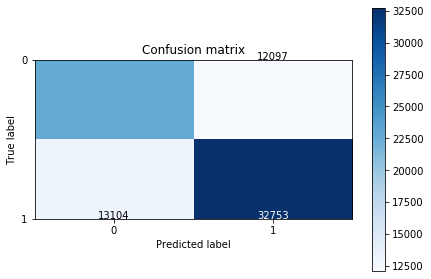

In [140]:
# Confusion Matrix 
from sklearn import metrics

confussion = metrics.confusion_matrix(y_train_pred_final['Performance Tag'], y_train_pred_final.Predicted )

print("Recall metric in the train dataset: {}%".format(100*confussion[1,1]/(confussion[1,0]+confussion[1,1])))


class_names = [0,1]
plt.figure()
plot_confusion_matrix(confussion , classes=class_names, title='Confusion matrix')
plt.show()

In [141]:
# Accuracy 
print(metrics.accuracy_score(y_train_pred_final['Performance Tag'], y_train_pred_final.Predicted))

0.6880330770849581


In [142]:
TP = confussion[1,1] 
TN = confussion[0,0] 
FP = confussion[0,1] 
FN = confussion[1,0]

In [143]:
# Sensitivity 
TP / float(TP+FN)

0.7142421004426805

In [144]:
# Specificity
TN / float(TN+FP)

0.6536192875959226

In [145]:
# Precision
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_pred_final['Performance Tag'], y_train_pred_final.Predicted)

0.7302787068004459

In [146]:
### Recall
recall_score(y_train_pred_final['Performance Tag'], y_train_pred_final.Predicted)

0.7142421004426805

Total Accuracy:  0.5759267210533848
Recall metric in the testing dataset: 68.75712656784492%
Precision metric in the testing dataset: 97.66669505237162%


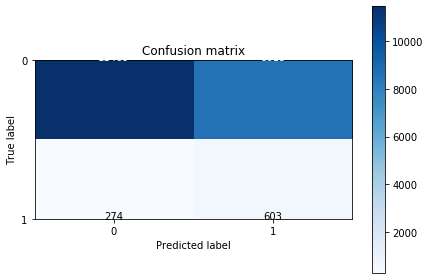

In [147]:
# Making Predcition on the Test Data
y_pre = lr1.predict(X_test_res)

cnf_matrix = confusion_matrix(y_test_pd, y_pre)

print("Total Accuracy: ", metrics.accuracy_score(y_test_pd, y_pre))
print("Recall metric in the testing dataset: {}%".format(100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))
print("Precision metric in the testing dataset: {}%".format(100*cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0])))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
plt.show()

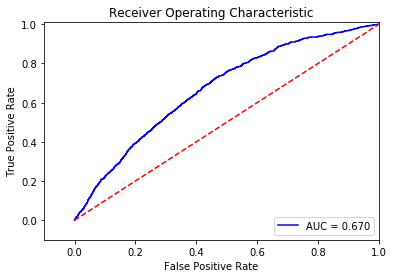

In [148]:
# Printing the ROC Curve for Train Data
tmp = lr1
y_pred_sample_score = tmp.decision_function(X_test_res)


fpr, tpr, thresholds = roc_curve(y_test_pd, y_pred_sample_score)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [149]:
# Printing the Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test_pd, y_pre))

              precision    recall  f1-score   support

         0.0       0.98      0.57      0.72     20084
         1.0       0.07      0.69      0.12       877

    accuracy                           0.58     20961
   macro avg       0.52      0.63      0.42     20961
weighted avg       0.94      0.58      0.70     20961



In [150]:
# Take the Predict Probabilities and plot a Gain Chart
import scikitplot as skplt
y_probas = lr1.predict_proba(X_test_res)
skplt.metrics.plot_cumulative_gain(y_test_pd, y_probas)
plt.show()

ModuleNotFoundError: No module named 'scikitplot'

In [151]:
### Plotting the Lift Chart
skplt.metrics.plot_lift_curve(y_test_pd, y_probas)
plt.show()

NameError: name 'skplt' is not defined

### Now building Decision Tree and Random Forrest on the same dataset

### Decision Tree

In [152]:
# Importing decision tree library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train_res, y_train_pd[0])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [153]:
# Evaluating metrics of our default model

from sklearn.metrics import classification_report, confusion_matrix

# Making predictions
y_pred_default = dt_default.predict(X_test_res)

# Checking classification report
print(classification_report(y_test_pd, y_pred_default))

              precision    recall  f1-score   support

         0.0       0.97      0.58      0.73     20084
         1.0       0.06      0.58      0.10       877

    accuracy                           0.58     20961
   macro avg       0.51      0.58      0.42     20961
weighted avg       0.93      0.58      0.70     20961



In [154]:
# Confusion matrix
print(confusion_matrix(y_test_pd,y_pred_default))


[[11653  8431]
 [  366   511]]


In [155]:
# Create the parameter grid based on the Default Model
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, return_train_score = True, 
                           cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_res, y_train_pd[0])

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   48.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                      

In [156]:
# Best Params for Model
grid_search.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [157]:
# scores of GridSearch CV
scoresDT = grid_search.cv_results_
pd.DataFrame(scoresDT).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.548826,0.021766,0.005596,0.000490,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.725815,...,0.747342,0.010884,15,0.749025,0.746224,0.747760,0.751752,0.746542,0.748261,0.002006
1,0.552840,0.013227,0.006996,0.001264,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.725815,...,0.747342,0.010884,15,0.749025,0.746224,0.747760,0.751752,0.746542,0.748261,0.002006
2,0.549480,0.017584,0.006398,0.001019,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.725815,...,0.747453,0.010858,13,0.749025,0.746224,0.747760,0.750422,0.746604,0.748007,0.001554
3,0.538343,0.024761,0.005998,0.000001,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.725815,...,0.747453,0.010858,13,0.749025,0.746224,0.747760,0.750422,0.746604,0.748007,0.001554
4,0.772799,0.046093,0.005598,0.000490,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.785480,...,0.836694,0.026335,5,0.866226,0.843247,0.843389,0.833362,0.835004,0.844246,0.011737


In [158]:
# Building model based on the best Estimator and fit the Train dataset
dTree = grid_search.best_estimator_

dTree = dTree.fit(X_train_res, y_train_res.ravel())

In [159]:
# Predict train Dataset
y_traindTree_pred = dTree.predict(X_train_res)

In [160]:
# Making the Final DataFrame to be used for Printing out Model Metrics with Train dataset
y_train_dTreepred_final = pd.DataFrame({'Performance Tag':y_train_pd[0], 'Predicted':y_traindTree_pred})
y_train_dTreepred_final

,Performance Tag,Predicted
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
80776,1.0,1.0
80777,1.0,0.0
80778,1.0,1.0
80779,1.0,1.0


Recall metric in the train dataset: 86.54949080838259%


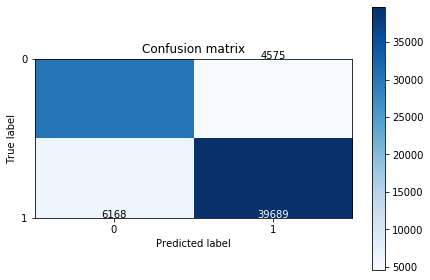

In [161]:
# Printing out the Confusion Matrix
confussion_dtree = metrics.confusion_matrix(y_train_dTreepred_final['Performance Tag'], y_train_dTreepred_final.Predicted)

print("Recall metric in the train dataset: {}%".format(100*confussion_dtree[1,1]/(confussion_dtree[1,0]+confussion_dtree[1,1])))


class_names = [0,1]
plt.figure()
plot_confusion_matrix(confussion_dtree , classes=class_names, title='Confusion matrix')
plt.show()

In [162]:
TP_dtree = confussion_dtree[1,1] 
TN_dtree = confussion_dtree[0,0] 
FP_dtree = confussion_dtree[0,1] 
FN_dtree = confussion_dtree[1,0]

In [163]:
# Sensitivity
TP_dtree / float(TP_dtree+FN_dtree)

0.8654949080838258

In [164]:
# Specificity
TN_dtree / float(TN_dtree+FP_dtree)

0.8690012598785936

In [165]:
# Accuracy
print(metrics.accuracy_score(y_train_dTreepred_final['Performance Tag'], y_train_dTreepred_final.Predicted))

0.8670108069966947


In [166]:
# Recall
print(metrics.recall_score(y_train_dTreepred_final['Performance Tag'], y_train_dTreepred_final.Predicted))

0.8654949080838258


In [167]:
# Precision
print(metrics.precision_score(y_train_dTreepred_final['Performance Tag'], y_train_dTreepred_final.Predicted))

0.8966428700524128


Total Accuracy:  0.8077858880778589
Recall metric in the testing dataset: 24.059293044469783%
Precision metric in the testing dataset: 96.16955196411112%


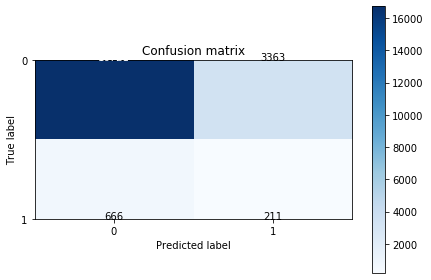

In [168]:
# Predcition with Decision Trees on the Test Data
y_preDT = dTree.predict(X_test_res)

cnf_matrixDT = confusion_matrix(y_test_pd, y_preDT)

print("Total Accuracy: ", metrics.accuracy_score(y_test_pd, y_preDT))
print("Recall metric in the testing dataset: {}%".format(100*cnf_matrixDT[1,1]/(cnf_matrixDT[1,0]+cnf_matrixDT[1,1])))
print("Precision metric in the testing dataset: {}%".format(100*cnf_matrixDT[0,0]/(cnf_matrixDT[0,0]+cnf_matrixDT[1,0])))

#  confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrixDT , classes=class_names, title='Confusion matrix')
plt.show()

In [169]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test_pd, y_preDT))

              precision    recall  f1-score   support

         0.0       0.96      0.83      0.89     20084
         1.0       0.06      0.24      0.09       877

    accuracy                           0.81     20961
   macro avg       0.51      0.54      0.49     20961
weighted avg       0.92      0.81      0.86     20961



### Random Forest

In [170]:
# Importing random forest library
from sklearn.ensemble import RandomForestClassifier

# random forest with default parameters.
rfc = RandomForestClassifier()

In [171]:
# fit model
rfc = rfc.fit(X_train_res, y_train_pd[0])

C:\Users\ADMIN\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [172]:
# Making predictions
predictionsRF = rfc.predict(X_test_res)

In [173]:
# Classification Report
print(classification_report(y_test_pd,predictionsRF))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97     20084
         1.0       0.08      0.02      0.04       877

    accuracy                           0.95     20961
   macro avg       0.52      0.51      0.50     20961
weighted avg       0.92      0.95      0.93     20961



Total Accuracy:  0.948475740661228
Recall metric in the testing dataset: 2.280501710376283%
Precision metric in the testing dataset: 95.86350033787045%


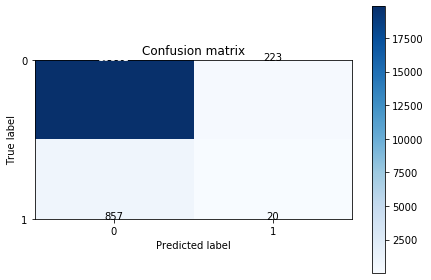

In [174]:
# Making Predcition with Decision Trees on the Test Data
y_preRF = predictionsRF

cnf_matrixRF = confusion_matrix(y_test_pd, y_preRF)

print("Total Accuracy: ", metrics.accuracy_score(y_test_pd, y_preRF))
print("Recall metric in the testing dataset: {}%".format(100*cnf_matrixRF[1,1]/(cnf_matrixRF[1,0]+cnf_matrixRF[1,1])))
print("Precision metric in the testing dataset: {}%".format(100*cnf_matrixRF[0,0]/(cnf_matrixRF[0,0]+cnf_matrixRF[1,0])))

# confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrixRF , classes=class_names, title='Confusion matrix')
plt.show()

In [175]:
# Accuracy 
print(metrics.accuracy_score(y_test_pd,predictionsRF))

0.948475740661228


In [176]:
# Using GridSearchCV for finding Optimal Parameters
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5),
             'min_samples_leaf': range(50, 150, 50),
             'min_samples_split': range(50, 150, 50),
             'criterion': ["entropy", "gini"]}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(estimator = rf, param_grid = parameters, 
                    cv=n_folds, return_train_score=True,
                   n_jobs = -1,verbose = 1)
rf = rf.fit(X_train_res, y_train_pd[0])

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   29.8s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  1.8min finished
C:\Users\ADMIN\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [177]:
# Accuracy and hyperparameters
print('We can get accuracy of',rf.best_score_,'using',rf.best_params_)

We can get accuracy of 0.9264183409465097 using {'criterion': 'entropy', 'max_depth': 17, 'min_samples_leaf': 50, 'min_samples_split': 100}


In [178]:
rf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=17, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [179]:
# scores of GridSearch CV
scoresRF = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_multi_class,param_solver,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.740135,0.009629,0.004197,0.000400,balanced,ovr,newton-cg,"{'class_weight': 'balanced', 'multi_class': 'o...",0.690784,0.689175,...,0.688144,0.003171,1,0.688599,0.687809,0.689331,0.687041,0.687804,0.688117,0.000782
1,0.402159,0.021695,0.003594,0.000487,balanced,ovr,lbfgs,"{'class_weight': 'balanced', 'multi_class': 'o...",0.690784,0.689175,...,0.688132,0.003195,4,0.688614,0.687840,0.689300,0.687010,0.687788,0.688110,0.000782
2,0.385974,0.014378,0.003797,0.000747,balanced,ovr,liblinear,"{'class_weight': 'balanced', 'multi_class': 'o...",0.690784,0.689175,...,0.688144,0.003171,1,0.688568,0.687809,0.689331,0.686994,0.687804,0.688101,0.000791
3,1.229029,0.050686,0.003797,0.000400,balanced,ovr,sag,"{'class_weight': 'balanced', 'multi_class': 'o...",0.690784,0.689175,...,0.688144,0.003171,1,0.688583,0.687809,0.689346,0.687041,0.687804,0.688117,0.000785


In [180]:
rf = rf.best_estimator_

In [181]:
# fit
rf.fit(X_train_res,y_train_pd[0])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=17, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [182]:
# Predictions 
predictionsRF = rf.predict(X_test_res)

Total Accuracy:  0.8825914794141501
Recall metric in the testing dataset: 14.139110604332954%
Precision metric in the testing dataset: 96.06356840399394%


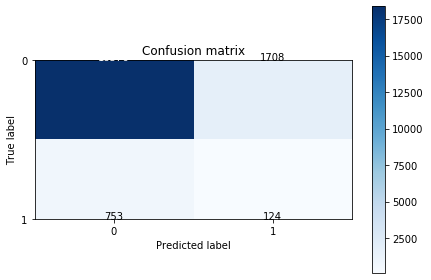

In [183]:
# Making Predcition with Decision Trees on the Test Data
y_preRF = predictionsRF

cnf_matrixRF = confusion_matrix(y_test_pd, y_preRF)

print("Total Accuracy: ", metrics.accuracy_score(y_test_pd, y_preRF))
print("Recall metric in the testing dataset: {}%".format(100*cnf_matrixRF[1,1]/(cnf_matrixRF[1,0]+cnf_matrixRF[1,1])))
print("Precision metric in the testing dataset: {}%".format(100*cnf_matrixRF[0,0]/(cnf_matrixRF[0,0]+cnf_matrixRF[1,0])))

# Confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrixRF , classes=class_names, title='Confusion matrix')
plt.show()

In [184]:

print(classification_report(y_test_pd,predictionsRF))

              precision    recall  f1-score   support

         0.0       0.96      0.91      0.94     20084
         1.0       0.07      0.14      0.09       877

    accuracy                           0.88     20961
   macro avg       0.51      0.53      0.51     20961
weighted avg       0.92      0.88      0.90     20961



In [185]:
#From above models we found that logistic regression has bes balance of accuracy,recall and precision.

In [186]:
master_df_new=master_df.copy()

### predicting on whole dataset for analysis using logistic regression

In [188]:
Y_new = master_df_new['Performance Tag']
X_new = master_df_new.drop(['Performance Tag'], 1)


In [189]:
predict=lr1.predict(X_new)

In [190]:
Y_new=pd.DataFrame(Y_new)

In [191]:
predicted = predict.reshape(-1)
predicted[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [192]:
master_df_new['predicted']=predicted

Total Accuracy:  0.5781985772968641
Recall metric in the testing dataset: 69.53867028493895%
Precision metric in the testing dataset: 97.71181042170977%


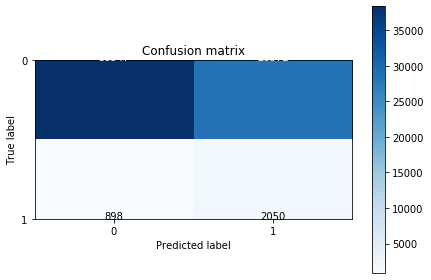

In [193]:
# Making Predcition with Decision Trees on the Test Data

cnf_matrixRF = confusion_matrix(Y_new, predict)

print("Total Accuracy: ", metrics.accuracy_score(Y_new, predict))
print("Recall metric in the testing dataset: {}%".format(100*cnf_matrixRF[1,1]/(cnf_matrixRF[1,0]+cnf_matrixRF[1,1])))
print("Precision metric in the testing dataset: {}%".format(100*cnf_matrixRF[0,0]/(cnf_matrixRF[0,0]+cnf_matrixRF[1,0])))

# Confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrixRF , classes=class_names, title='Confusion matrix')
plt.show()

In [194]:
master_df_new

,Performance Tag,No of times 90 DPD or worse in last 6 months_woe,No of times 60 DPD or worse in last 6 months_woe,No of times 30 DPD or worse in last 6 months_woe,No of times 90 DPD or worse in last 12 months_woe,No of times 60 DPD or worse in last 12 months_woe,No of times 30 DPD or worse in last 12 months_woe,No of Inquiries in last 6 months (excluding home & auto loans)_woe,No of Inquiries in last 12 months (excluding home & auto loans)_woe,No of PL trades opened in last 12 months_woe,No of PL trades opened in last 6 months_woe,No of trades opened in last 6 months_woe,No of trades opened in last 12 months_woe,Avgas CC Utilization in last 12 months_woe,Outstanding Balance_woe,Total No of Trades_woe,Income_woe,No of months in current residence_woe,No of months in current company_woe,predicted
Application ID,,,,,,,,,,,,,,,,,,,,
954457215,0.0,-0.261032,-0.336701,-0.387125,-0.356987,-0.352253,-0.376727,-0.718544,-1.067842,-0.894165,-0.649533,-0.479885,-0.816714,-0.870747,-0.832469,-0.049155,-0.273218,-0.069491,-0.229105,0.0
432830445,0.0,-0.261032,-0.336701,-0.387125,-0.356987,-0.352253,-0.376727,-0.718544,-1.067842,-0.894165,-0.649533,-0.479885,-0.816714,-0.870747,-0.772167,0.132946,-0.385850,-0.069491,-0.145849,0.0
941387308,0.0,-0.261032,-0.336701,-0.387125,-0.356987,-0.352253,-0.376727,-0.718544,-1.067842,-0.894165,-0.649533,-0.657914,-0.653610,-0.727079,-0.832469,-0.702260,-0.169700,-0.069491,-0.255198,0.0
392161677,0.0,-0.261032,-0.336701,-0.387125,-0.356987,-0.352253,-0.376727,-0.718544,-1.067842,-0.894165,-0.649533,-0.479885,-1.019440,-0.607575,0.294279,-0.049155,-0.385850,0.121151,-0.255198,0.0
182011211,0.0,-0.261032,-0.336701,-0.387125,-0.356987,-0.352253,-0.376727,-0.718544,-1.067842,-0.894165,-0.649533,-0.657914,-1.019440,-0.415004,-0.832469,-0.049155,-0.169700,-0.069491,-0.145849,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254036864,0.0,0.587564,0.668121,0.951435,0.508469,0.752385,0.936896,0.428282,0.509670,0.425795,0.423261,0.434641,0.429372,-0.870747,0.403373,0.512261,0.078752,-0.253229,0.101657,1.0
375231276,1.0,-0.261032,0.542216,0.666479,-0.356987,0.213800,0.593976,0.215743,0.247751,0.377938,0.423261,0.523908,0.412836,-0.870747,0.294279,0.488895,0.352682,0.472881,0.182979,1.0
32481239,0.0,-0.261032,0.542216,0.666479,0.508469,0.752385,0.593976,0.215743,0.247751,0.425795,0.200454,-0.479885,0.683865,-0.870747,0.294279,0.512261,0.139283,0.304993,0.000570,1.0


#### Assuming loss when default to be 10000 and profit by non-default customer to be 500

In [199]:
#Profit
def profit(data):
    if data['Performance Tag']==1 and data['predicted']==1:
        return 10000
    else:
        return 0

In [200]:
master_df_new['profit']=master_df_new.apply(profit,axis=1)

In [201]:
master_df_new

,Performance Tag,No of times 90 DPD or worse in last 6 months_woe,No of times 60 DPD or worse in last 6 months_woe,No of times 30 DPD or worse in last 6 months_woe,No of times 90 DPD or worse in last 12 months_woe,No of times 60 DPD or worse in last 12 months_woe,No of times 30 DPD or worse in last 12 months_woe,No of Inquiries in last 6 months (excluding home & auto loans)_woe,No of Inquiries in last 12 months (excluding home & auto loans)_woe,No of PL trades opened in last 12 months_woe,...,No of trades opened in last 6 months_woe,No of trades opened in last 12 months_woe,Avgas CC Utilization in last 12 months_woe,Outstanding Balance_woe,Total No of Trades_woe,Income_woe,No of months in current residence_woe,No of months in current company_woe,predicted,profit
Application ID,,,,,,,,,,,,,,,,,,,,,
954457215,0.0,-0.261032,-0.336701,-0.387125,-0.356987,-0.352253,-0.376727,-0.718544,-1.067842,-0.894165,...,-0.479885,-0.816714,-0.870747,-0.832469,-0.049155,-0.273218,-0.069491,-0.229105,0.0,0
432830445,0.0,-0.261032,-0.336701,-0.387125,-0.356987,-0.352253,-0.376727,-0.718544,-1.067842,-0.894165,...,-0.479885,-0.816714,-0.870747,-0.772167,0.132946,-0.385850,-0.069491,-0.145849,0.0,0
941387308,0.0,-0.261032,-0.336701,-0.387125,-0.356987,-0.352253,-0.376727,-0.718544,-1.067842,-0.894165,...,-0.657914,-0.653610,-0.727079,-0.832469,-0.702260,-0.169700,-0.069491,-0.255198,0.0,0
392161677,0.0,-0.261032,-0.336701,-0.387125,-0.356987,-0.352253,-0.376727,-0.718544,-1.067842,-0.894165,...,-0.479885,-1.019440,-0.607575,0.294279,-0.049155,-0.385850,0.121151,-0.255198,0.0,0
182011211,0.0,-0.261032,-0.336701,-0.387125,-0.356987,-0.352253,-0.376727,-0.718544,-1.067842,-0.894165,...,-0.657914,-1.019440,-0.415004,-0.832469,-0.049155,-0.169700,-0.069491,-0.145849,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254036864,0.0,0.587564,0.668121,0.951435,0.508469,0.752385,0.936896,0.428282,0.509670,0.425795,...,0.434641,0.429372,-0.870747,0.403373,0.512261,0.078752,-0.253229,0.101657,1.0,0
375231276,1.0,-0.261032,0.542216,0.666479,-0.356987,0.213800,0.593976,0.215743,0.247751,0.377938,...,0.523908,0.412836,-0.870747,0.294279,0.488895,0.352682,0.472881,0.182979,1.0,10000
32481239,0.0,-0.261032,0.542216,0.666479,0.508469,0.752385,0.593976,0.215743,0.247751,0.425795,...,-0.479885,0.683865,-0.870747,0.294279,0.512261,0.139283,0.304993,0.000570,1.0,0


In [202]:
#Profit by predicting customer who might default in future.
master_df_new.profit.sum()

20500000

In [203]:
#Profit
def loss(data):
    if data['Performance Tag']==0 and data['predicted']==1:
        return 500
    else:
        return 0

In [204]:
master_df_new['loss']=master_df_new.apply(loss,axis=1)

In [205]:
master_df_new

,Performance Tag,No of times 90 DPD or worse in last 6 months_woe,No of times 60 DPD or worse in last 6 months_woe,No of times 30 DPD or worse in last 6 months_woe,No of times 90 DPD or worse in last 12 months_woe,No of times 60 DPD or worse in last 12 months_woe,No of times 30 DPD or worse in last 12 months_woe,No of Inquiries in last 6 months (excluding home & auto loans)_woe,No of Inquiries in last 12 months (excluding home & auto loans)_woe,No of PL trades opened in last 12 months_woe,...,No of trades opened in last 12 months_woe,Avgas CC Utilization in last 12 months_woe,Outstanding Balance_woe,Total No of Trades_woe,Income_woe,No of months in current residence_woe,No of months in current company_woe,predicted,profit,loss
Application ID,,,,,,,,,,,,,,,,,,,,,
954457215,0.0,-0.261032,-0.336701,-0.387125,-0.356987,-0.352253,-0.376727,-0.718544,-1.067842,-0.894165,...,-0.816714,-0.870747,-0.832469,-0.049155,-0.273218,-0.069491,-0.229105,0.0,0,0
432830445,0.0,-0.261032,-0.336701,-0.387125,-0.356987,-0.352253,-0.376727,-0.718544,-1.067842,-0.894165,...,-0.816714,-0.870747,-0.772167,0.132946,-0.385850,-0.069491,-0.145849,0.0,0,0
941387308,0.0,-0.261032,-0.336701,-0.387125,-0.356987,-0.352253,-0.376727,-0.718544,-1.067842,-0.894165,...,-0.653610,-0.727079,-0.832469,-0.702260,-0.169700,-0.069491,-0.255198,0.0,0,0
392161677,0.0,-0.261032,-0.336701,-0.387125,-0.356987,-0.352253,-0.376727,-0.718544,-1.067842,-0.894165,...,-1.019440,-0.607575,0.294279,-0.049155,-0.385850,0.121151,-0.255198,0.0,0,0
182011211,0.0,-0.261032,-0.336701,-0.387125,-0.356987,-0.352253,-0.376727,-0.718544,-1.067842,-0.894165,...,-1.019440,-0.415004,-0.832469,-0.049155,-0.169700,-0.069491,-0.145849,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254036864,0.0,0.587564,0.668121,0.951435,0.508469,0.752385,0.936896,0.428282,0.509670,0.425795,...,0.429372,-0.870747,0.403373,0.512261,0.078752,-0.253229,0.101657,1.0,0,500
375231276,1.0,-0.261032,0.542216,0.666479,-0.356987,0.213800,0.593976,0.215743,0.247751,0.377938,...,0.412836,-0.870747,0.294279,0.488895,0.352682,0.472881,0.182979,1.0,10000,0
32481239,0.0,-0.261032,0.542216,0.666479,0.508469,0.752385,0.593976,0.215743,0.247751,0.425795,...,0.683865,-0.870747,0.294279,0.512261,0.139283,0.304993,0.000570,1.0,0,500


In [206]:
#Loss for predicting customers as defaulted who have not defaulted.
master_df_new.loss.sum()

14286000

## Building Application Score Card 

In [207]:
#Finding the proability of deault for each entry
predicted_probability=lr1.predict_proba(X_new)

In [208]:
predicted_probability=pd.DataFrame(predicted_probability)

In [209]:
master_df_new=master_df_new.reset_index()

In [210]:
#Seperating probability and odds
master_df_new['probability']=predicted_probability[1]
master_df_new['odds']=predicted_probability[0]

In [211]:
master_df_new

,Application ID,Performance Tag,No of times 90 DPD or worse in last 6 months_woe,No of times 60 DPD or worse in last 6 months_woe,No of times 30 DPD or worse in last 6 months_woe,No of times 90 DPD or worse in last 12 months_woe,No of times 60 DPD or worse in last 12 months_woe,No of times 30 DPD or worse in last 12 months_woe,No of Inquiries in last 6 months (excluding home & auto loans)_woe,No of Inquiries in last 12 months (excluding home & auto loans)_woe,...,Outstanding Balance_woe,Total No of Trades_woe,Income_woe,No of months in current residence_woe,No of months in current company_woe,predicted,profit,loss,probability,odds
0,954457215,0.0,-0.261032,-0.336701,-0.387125,-0.356987,-0.352253,-0.376727,-0.718544,-1.067842,...,-0.832469,-0.049155,-0.273218,-0.069491,-0.229105,0.0,0,0,0.144092,0.855908
1,432830445,0.0,-0.261032,-0.336701,-0.387125,-0.356987,-0.352253,-0.376727,-0.718544,-1.067842,...,-0.772167,0.132946,-0.385850,-0.069491,-0.145849,0.0,0,0,0.142111,0.857889
2,941387308,0.0,-0.261032,-0.336701,-0.387125,-0.356987,-0.352253,-0.376727,-0.718544,-1.067842,...,-0.832469,-0.702260,-0.169700,-0.069491,-0.255198,0.0,0,0,0.190038,0.809962
3,392161677,0.0,-0.261032,-0.336701,-0.387125,-0.356987,-0.352253,-0.376727,-0.718544,-1.067842,...,0.294279,-0.049155,-0.385850,0.121151,-0.255198,0.0,0,0,0.183096,0.816904
4,182011211,0.0,-0.261032,-0.336701,-0.387125,-0.356987,-0.352253,-0.376727,-0.718544,-1.067842,...,-0.832469,-0.049155,-0.169700,-0.069491,-0.145849,0.0,0,0,0.171358,0.828642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69862,254036864,0.0,0.587564,0.668121,0.951435,0.508469,0.752385,0.936896,0.428282,0.509670,...,0.403373,0.512261,0.078752,-0.253229,0.101657,1.0,0,500,0.680474,0.319526
69863,375231276,1.0,-0.261032,0.542216,0.666479,-0.356987,0.213800,0.593976,0.215743,0.247751,...,0.294279,0.488895,0.352682,0.472881,0.182979,1.0,10000,0,0.654075,0.345925
69864,32481239,0.0,-0.261032,0.542216,0.666479,0.508469,0.752385,0.593976,0.215743,0.247751,...,0.294279,0.512261,0.139283,0.304993,0.000570,1.0,0,500,0.646423,0.353577
69865,704812159,0.0,0.809821,0.668121,0.951435,0.885199,0.884177,0.972425,0.428282,0.509670,...,0.294279,0.488895,0.352682,0.121151,-0.229105,1.0,0,500,0.791705,0.208295


In [213]:
#Calculating log of odds
import math
master_df_new['log_odds']=master_df_new.apply(lambda x : math.log(x.odds),axis=1)

In [214]:
master_df_new

,Application ID,Performance Tag,No of times 90 DPD or worse in last 6 months_woe,No of times 60 DPD or worse in last 6 months_woe,No of times 30 DPD or worse in last 6 months_woe,No of times 90 DPD or worse in last 12 months_woe,No of times 60 DPD or worse in last 12 months_woe,No of times 30 DPD or worse in last 12 months_woe,No of Inquiries in last 6 months (excluding home & auto loans)_woe,No of Inquiries in last 12 months (excluding home & auto loans)_woe,...,Total No of Trades_woe,Income_woe,No of months in current residence_woe,No of months in current company_woe,predicted,profit,loss,probability,odds,log_odds
0,954457215,0.0,-0.261032,-0.336701,-0.387125,-0.356987,-0.352253,-0.376727,-0.718544,-1.067842,...,-0.049155,-0.273218,-0.069491,-0.229105,0.0,0,0,0.144092,0.855908,-0.155592
1,432830445,0.0,-0.261032,-0.336701,-0.387125,-0.356987,-0.352253,-0.376727,-0.718544,-1.067842,...,0.132946,-0.385850,-0.069491,-0.145849,0.0,0,0,0.142111,0.857889,-0.153280
2,941387308,0.0,-0.261032,-0.336701,-0.387125,-0.356987,-0.352253,-0.376727,-0.718544,-1.067842,...,-0.702260,-0.169700,-0.069491,-0.255198,0.0,0,0,0.190038,0.809962,-0.210769
3,392161677,0.0,-0.261032,-0.336701,-0.387125,-0.356987,-0.352253,-0.376727,-0.718544,-1.067842,...,-0.049155,-0.385850,0.121151,-0.255198,0.0,0,0,0.183096,0.816904,-0.202233
4,182011211,0.0,-0.261032,-0.336701,-0.387125,-0.356987,-0.352253,-0.376727,-0.718544,-1.067842,...,-0.049155,-0.169700,-0.069491,-0.145849,0.0,0,0,0.171358,0.828642,-0.187968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69862,254036864,0.0,0.587564,0.668121,0.951435,0.508469,0.752385,0.936896,0.428282,0.509670,...,0.512261,0.078752,-0.253229,0.101657,1.0,0,500,0.680474,0.319526,-1.140917
69863,375231276,1.0,-0.261032,0.542216,0.666479,-0.356987,0.213800,0.593976,0.215743,0.247751,...,0.488895,0.352682,0.472881,0.182979,1.0,10000,0,0.654075,0.345925,-1.061535
69864,32481239,0.0,-0.261032,0.542216,0.666479,0.508469,0.752385,0.593976,0.215743,0.247751,...,0.512261,0.139283,0.304993,0.000570,1.0,0,500,0.646423,0.353577,-1.039653
69865,704812159,0.0,0.809821,0.668121,0.951435,0.885199,0.884177,0.972425,0.428282,0.509670,...,0.488895,0.352682,0.121151,-0.229105,1.0,0,500,0.791705,0.208295,-1.568802


In [215]:
#Calculating Ceditscore 
master_df_new['CreditScore']=master_df_new.apply(lambda x : int((x.log_odds*100)+400) ,axis=1)

In [216]:
master_df_new

,Application ID,Performance Tag,No of times 90 DPD or worse in last 6 months_woe,No of times 60 DPD or worse in last 6 months_woe,No of times 30 DPD or worse in last 6 months_woe,No of times 90 DPD or worse in last 12 months_woe,No of times 60 DPD or worse in last 12 months_woe,No of times 30 DPD or worse in last 12 months_woe,No of Inquiries in last 6 months (excluding home & auto loans)_woe,No of Inquiries in last 12 months (excluding home & auto loans)_woe,...,Income_woe,No of months in current residence_woe,No of months in current company_woe,predicted,profit,loss,probability,odds,log_odds,CreditScore
0,954457215,0.0,-0.261032,-0.336701,-0.387125,-0.356987,-0.352253,-0.376727,-0.718544,-1.067842,...,-0.273218,-0.069491,-0.229105,0.0,0,0,0.144092,0.855908,-0.155592,384
1,432830445,0.0,-0.261032,-0.336701,-0.387125,-0.356987,-0.352253,-0.376727,-0.718544,-1.067842,...,-0.385850,-0.069491,-0.145849,0.0,0,0,0.142111,0.857889,-0.153280,384
2,941387308,0.0,-0.261032,-0.336701,-0.387125,-0.356987,-0.352253,-0.376727,-0.718544,-1.067842,...,-0.169700,-0.069491,-0.255198,0.0,0,0,0.190038,0.809962,-0.210769,378
3,392161677,0.0,-0.261032,-0.336701,-0.387125,-0.356987,-0.352253,-0.376727,-0.718544,-1.067842,...,-0.385850,0.121151,-0.255198,0.0,0,0,0.183096,0.816904,-0.202233,379
4,182011211,0.0,-0.261032,-0.336701,-0.387125,-0.356987,-0.352253,-0.376727,-0.718544,-1.067842,...,-0.169700,-0.069491,-0.145849,0.0,0,0,0.171358,0.828642,-0.187968,381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69862,254036864,0.0,0.587564,0.668121,0.951435,0.508469,0.752385,0.936896,0.428282,0.509670,...,0.078752,-0.253229,0.101657,1.0,0,500,0.680474,0.319526,-1.140917,285
69863,375231276,1.0,-0.261032,0.542216,0.666479,-0.356987,0.213800,0.593976,0.215743,0.247751,...,0.352682,0.472881,0.182979,1.0,10000,0,0.654075,0.345925,-1.061535,293
69864,32481239,0.0,-0.261032,0.542216,0.666479,0.508469,0.752385,0.593976,0.215743,0.247751,...,0.139283,0.304993,0.000570,1.0,0,500,0.646423,0.353577,-1.039653,296
69865,704812159,0.0,0.809821,0.668121,0.951435,0.885199,0.884177,0.972425,0.428282,0.509670,...,0.352682,0.121151,-0.229105,1.0,0,500,0.791705,0.208295,-1.568802,243


In [217]:
credit_cut_off =master_df_new[master_df_new['predicted']==0]

In [218]:
#Cut-off score
print("Cut-off score:",credit_cut_off.CreditScore.min())

Cut-off score: 330


In [219]:
print("Maximum credit score:",credit_cut_off.CreditScore.max())

Maximum credit score: 388


In [220]:
rejected =master_df_new[master_df_new['predicted']==1]

In [221]:
print("Minimum Rejected score:",rejected.CreditScore.min())
print("Maximum Rejected score:",rejected.CreditScore.max())

Minimum Rejected score: 208
Maximum Rejected score: 330


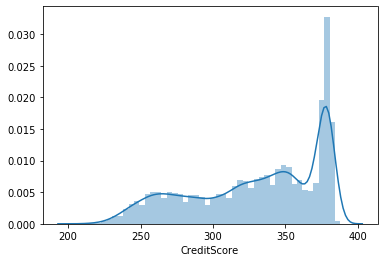

In [235]:
#Score distribution
sns.distplot(master_df_new.CreditScore)

### Finding important predictor variables

In [231]:
data=pd.DataFrame(np.hstack((X_train_res.columns)))

In [232]:
data['1']=lr1.coef_.ravel()

In [234]:
data.sort_values(['1'],ascending=False)

,0,1
17,No of months in current company_woe,0.593701
7,No of Inquiries in last 12 months (excluding h...,0.510641
11,No of trades opened in last 12 months_woe,0.476240
12,Avgas CC Utilization in last 12 months_woe,0.432591
15,Income_woe,0.358251
5,No of times 30 DPD or worse in last 12 months_woe,0.346405
13,Outstanding Balance_woe,0.284137
2,No of times 30 DPD or worse in last 6 months_woe,0.282431
9,No of PL trades opened in last 6 months_woe,0.274753
1,No of times 60 DPD or worse in last 6 months_woe,0.223872
